In [1]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import statistics as stat
from scipy.stats import iqr, shapiro, normaltest, mannwhitneyu, ttest_ind, ks_2samp
import scipy.stats as stats
from matplotlib import gridspec 

#### 1. Setting path and other necessary plotting functions

In [2]:
path = 'filtered data/'
path_results = 'Results/'

## Control Data Handling 

#### 2. Making the control demographic dataframe

In [3]:
df_demo_control = pd.read_csv(path + "control_demographic_data.csv")
df_demo_control.set_index("subject_no", inplace=True)
df_demo_control.head()

gender  age  education occupation  \
subject_no                                     
1               F    23         H        NPS   
2               F    21         H        NPS   
3               F    33         H          P   
4               F    24         H        NPS   
5               M    25         H        NPS   

                                   family_history  
subject_no                                         
1                  Not to the extent of knowledge  
2                  Not to the extent of knowledge  
3           Grandmother has late onset parkinsons  
4                     Grandmother has alzheimers   
5                  Not to the extent of knowledge

#### 3. Reading Control data
For each control data, there are 2 columns <br>
For each column, the descriptive stat is calculated

In [4]:
mean_at20 = []
std_at20 = []
median_at20 = []
iqr_at20 = []
mean_is20 = []
std_is20 = []
median_is20 = []
iqr_is20 = []
ks20 = []

for i in range (1,31):
    df = pd.read_csv(path + 's' + str(i) + '_r.csv')
    at20_column = "at20_s" + str(i) + "_r"
    is20_column = "is20_s" + str(i) + "_r"

    mean_at20.append(df[at20_column].mean())
    std_at20.append(df[at20_column].std())
    median_at20.append(df[at20_column].median())
    iqr_at20.append(iqr(df[at20_column]))
    
    mean_is20.append(df[is20_column].mean())
    std_is20.append(df[is20_column].std())
    median_is20.append(df[is20_column].median())
    iqr_is20.append(iqr(df[is20_column]))

    ks20.append(len(df))


#### 4. Making the dataframe from the descriptive stats of each control data

In [5]:
dataframe = {'mean_at20': mean_at20, 
             'std_at20': std_at20,
             'median_at20': median_at20,
             'iqr_at20': iqr_at20,
             'mean_is20': mean_is20,
             'std_is20': std_is20,
             'median_is20': median_is20,
             'iqr_is20': iqr_is20,
             'ks20': ks20,
             'gender': df_demo_control["gender"],
             'age': df_demo_control["age "]
             }
df_control = pd.DataFrame(dataframe)
df_control.tail()

mean_at20   std_at20  median_at20  iqr_at20   mean_is20  \
subject_no                                                            
26          43.669014  16.688095         45.0     17.00  119.704225   
27          63.493151  15.699878         63.0     17.75  102.938356   
28          70.696970  12.495458         70.5     16.25  100.583333   
29          81.220183  23.713708         77.0     25.00  123.724771   
30          85.018868  16.432825         83.0     19.00  120.216981   

             std_is20  median_is20  iqr_is20  ks20 gender  age  
subject_no                                                      
26          17.509385        118.5     16.75   142      M   40  
27          19.493314        101.0     17.00   146      F   34  
28          12.638268        102.0     17.00   132      M   22  
29          27.754169        120.0     23.00   109      M   32  
30          14.969814        119.0     18.75   106      M   45

In [6]:
df_control.describe()

mean_at20   std_at20  median_at20   iqr_at20   mean_is20   std_is20  \
count   30.000000  30.000000    30.000000  30.000000   30.000000  30.000000   
mean    57.597007  16.343439    57.033333  19.716667  120.490878  19.314581   
std     23.328256   6.917188    22.777762   6.794627   16.395613   6.952603   
min     17.149068   9.620273    12.000000  12.000000   93.824324   9.732916   
25%     43.928844  11.261376    43.500000  15.250000  109.780578  13.677886   
50%     54.461326  14.784154    54.000000  17.000000  119.938776  17.096751   
75%     73.878579  19.192749    73.875000  21.812500  124.553929  24.207153   
max    115.908163  43.214661   110.000000  39.500000  156.982609  35.186385   

       median_is20   iqr_is20        ks20        age  
count    30.000000  30.000000   30.000000  30.000000  
mean    118.966667  18.991667  126.000000  30.400000  
std      16.559159   5.027718   14.323841   9.768351  
min      89.000000  10.000000   98.000000  20.000000  
25%     108.000000  16.125000  118.500000  23.000000  
50%     119.000000  18.875000  123.000000  29.000000  
75%     122.500000  21.000000  135.500000  33.000000  
max     155.500000  34.500000  161.000000  65.000000

#### 5. Controls' KS20 paramter normality test and visulization

0.7231267917122832


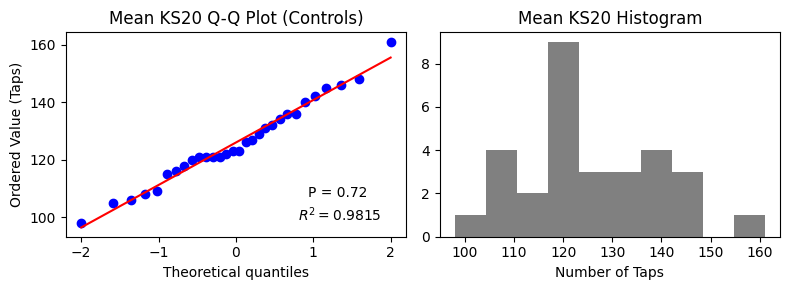

In [7]:
test_stat, pval = normaltest(df_control["ks20"])
print(pval)

txt = "P = " +str(round(pval,2))

fig = plt.figure(figsize=(8, 3))
gs = gridspec.GridSpec(1,2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
stats.probplot(df_control["ks20"], dist= "norm", plot = ax1, rvalue=True)
ax1.text(0.8, 0.25, txt, transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
ax1.set_title("Mean KS20 Q-Q Plot (Controls)")
ax1.set_ylabel("Ordered Value (Taps)")

ax2 = fig.add_subplot(gs[0,1])
plt.hist(df_control["ks20"], color="gray")
ax2.set_title("Mean KS20 Histogram")
ax2.set_xlabel("Number of Taps")

plt.tight_layout()
plt.savefig(path_results + "ks20.jpg")
plt.show()


#### 6. QQ plots for controls AT20 and IS20

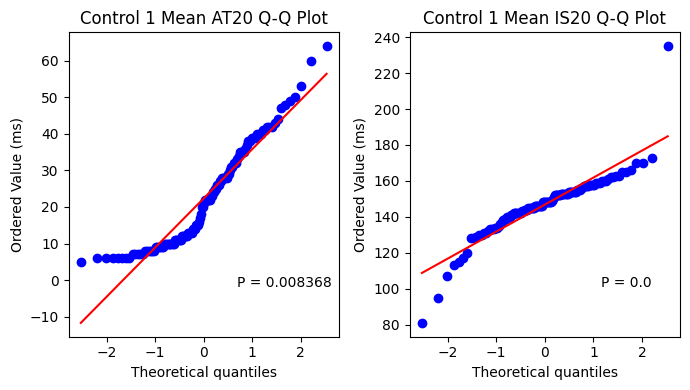

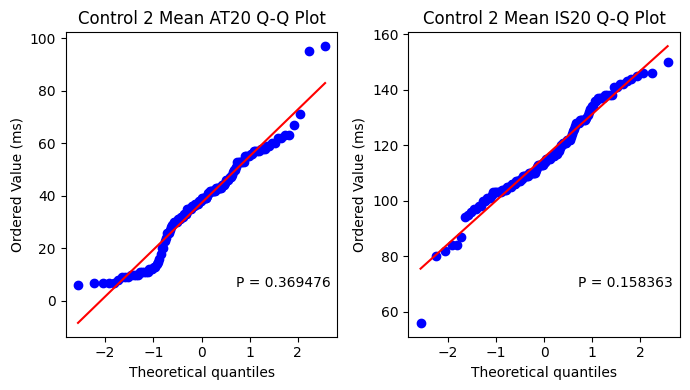

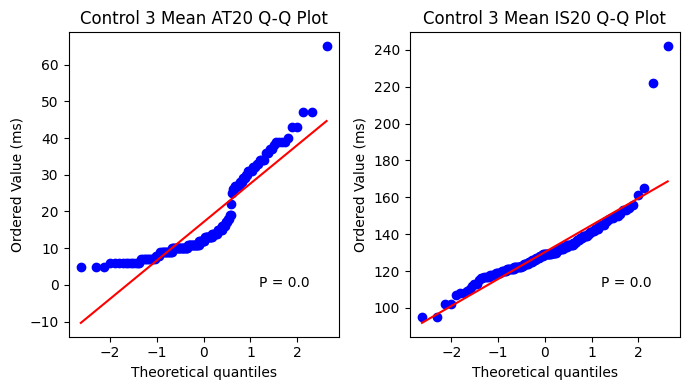

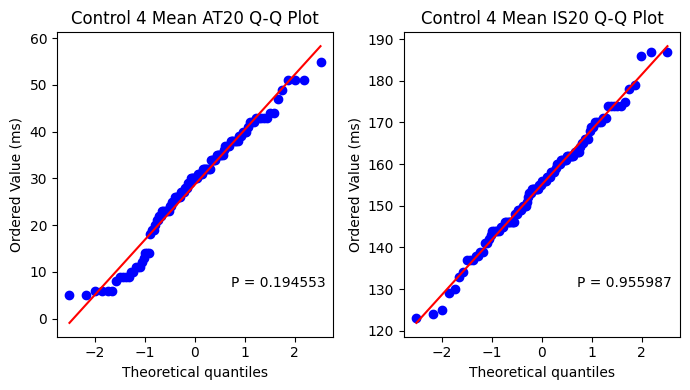

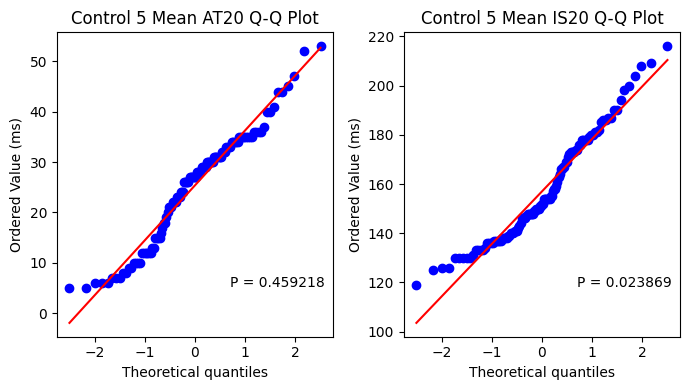

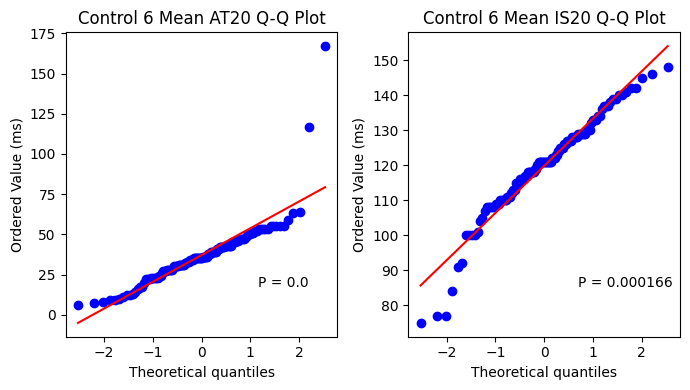

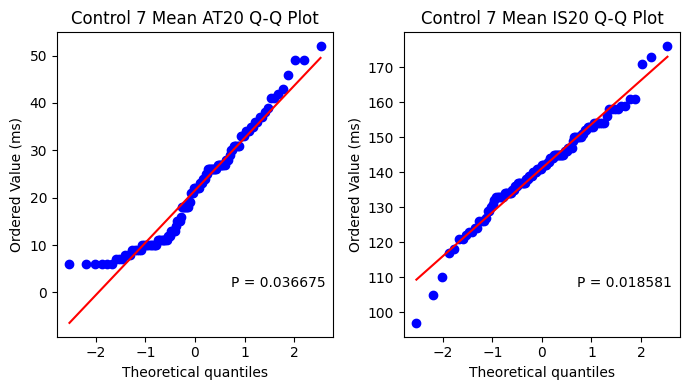

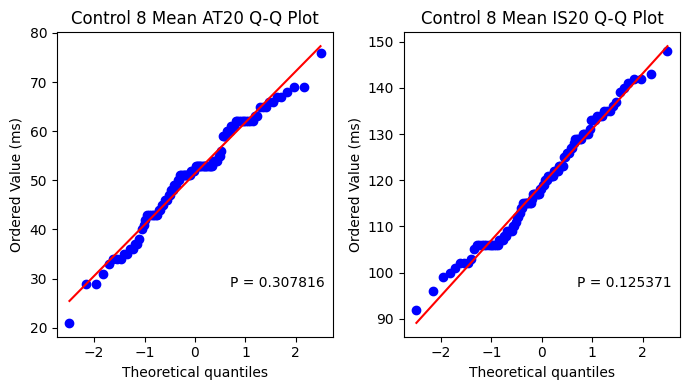

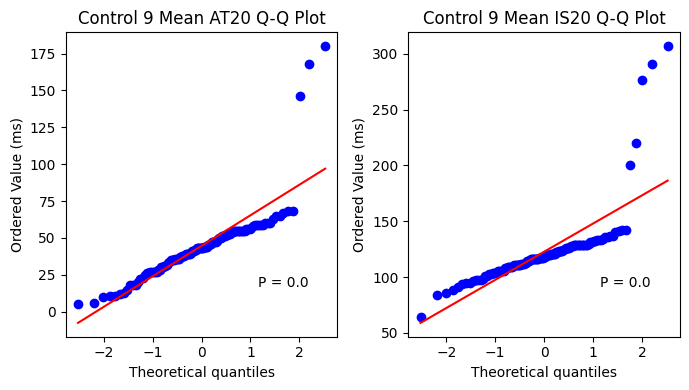

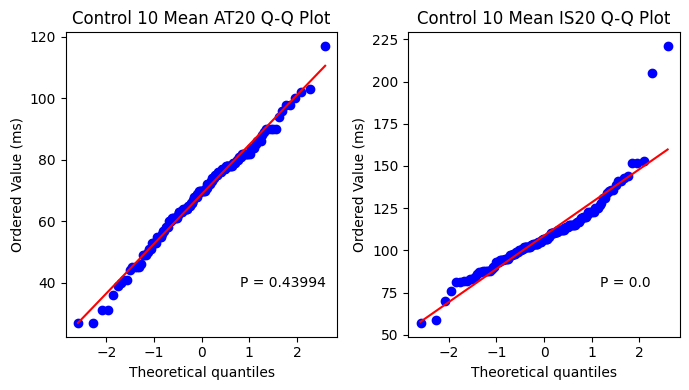

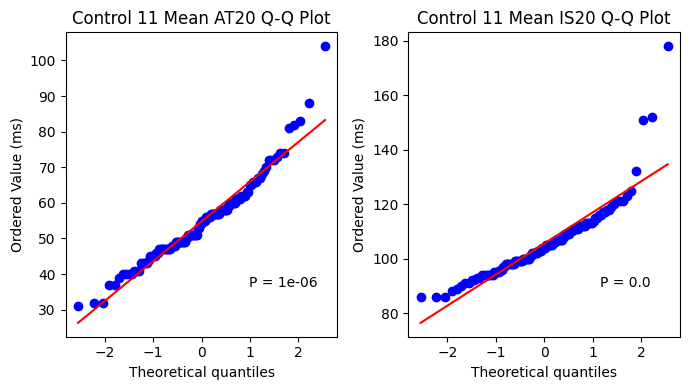

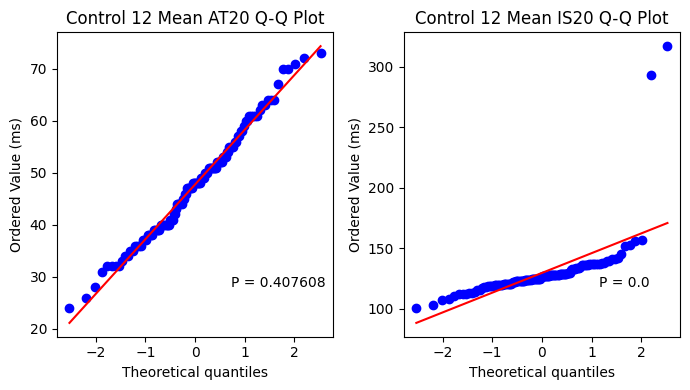

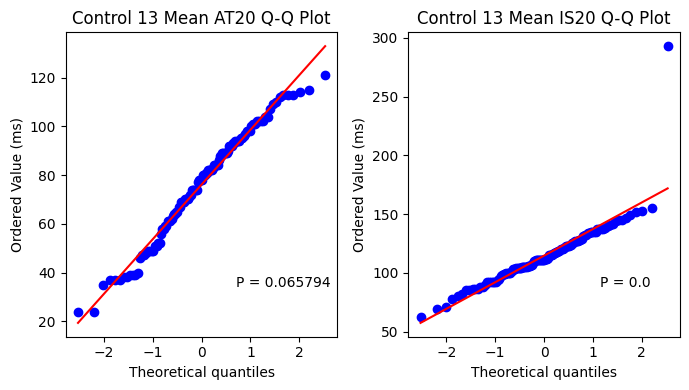

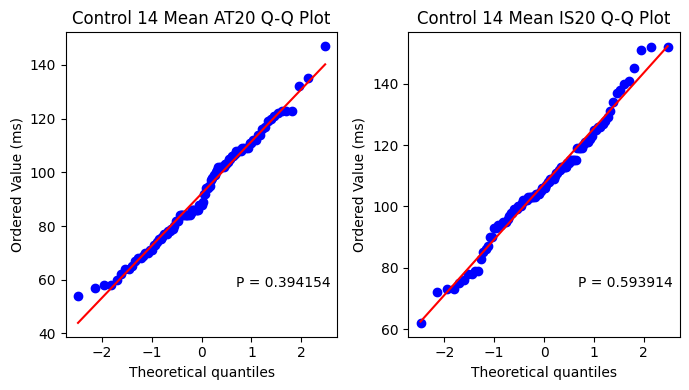

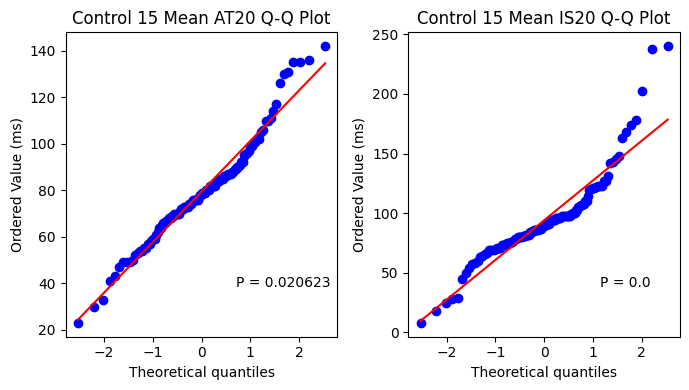

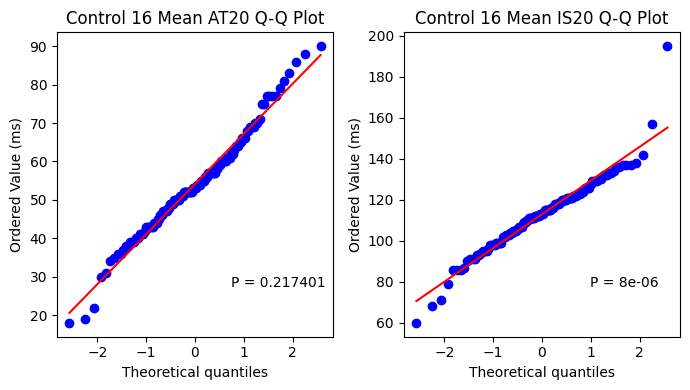

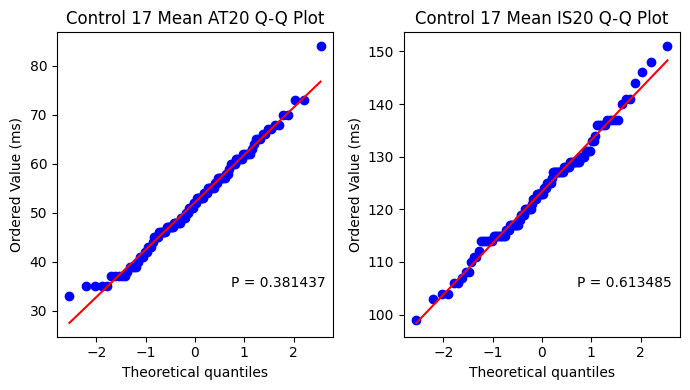

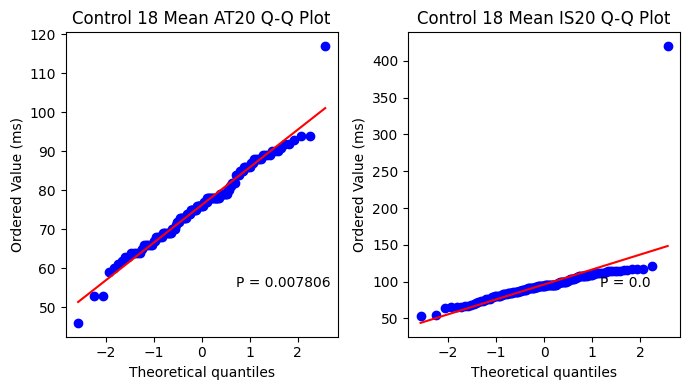

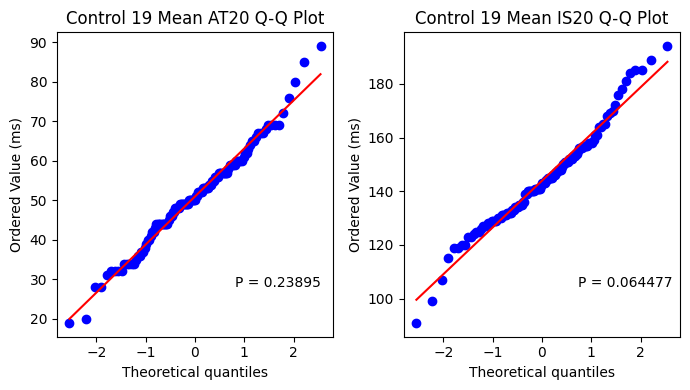

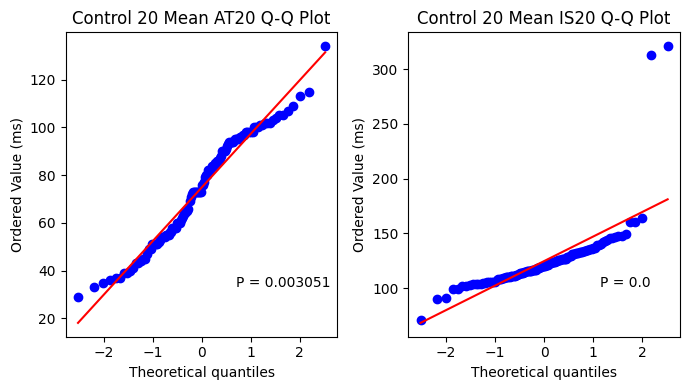

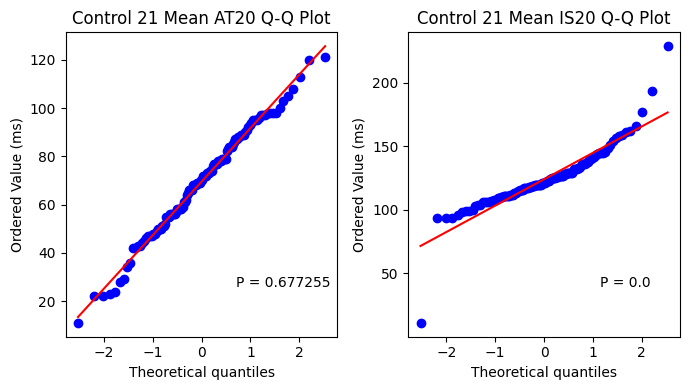

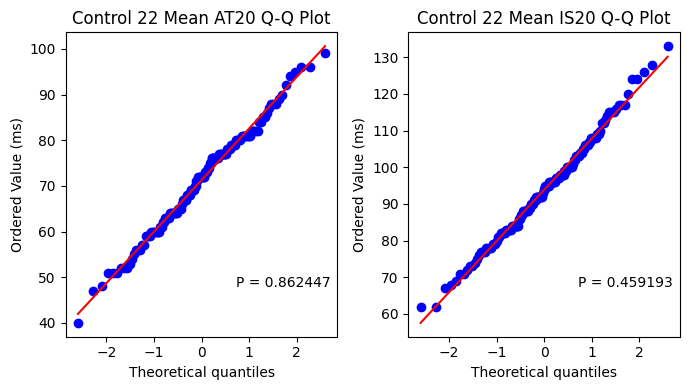

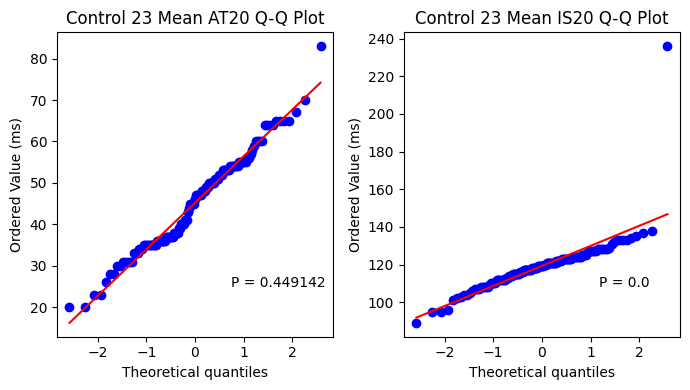

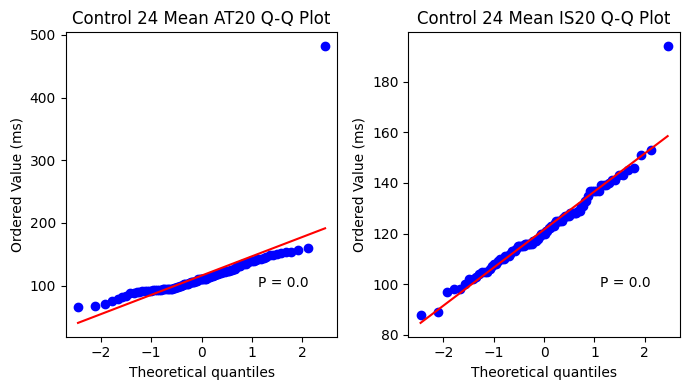

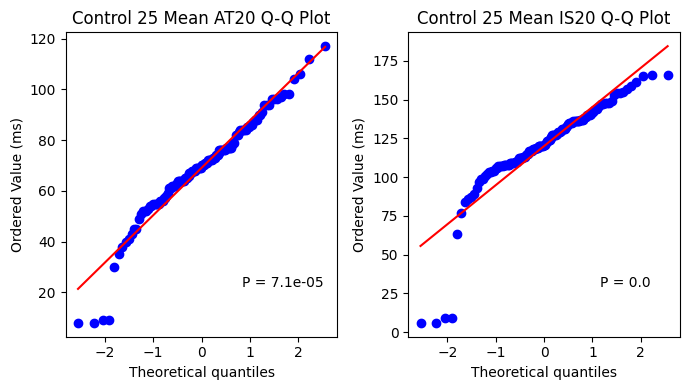

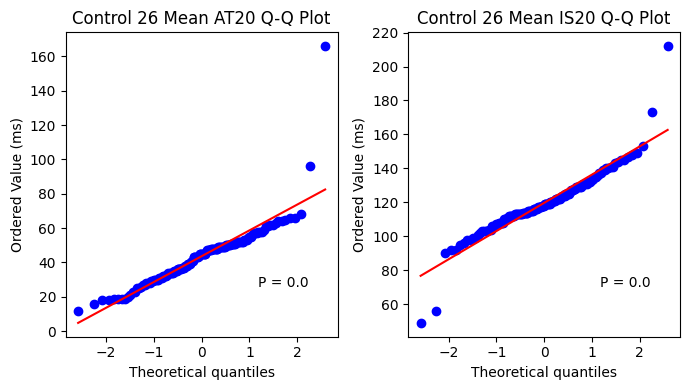

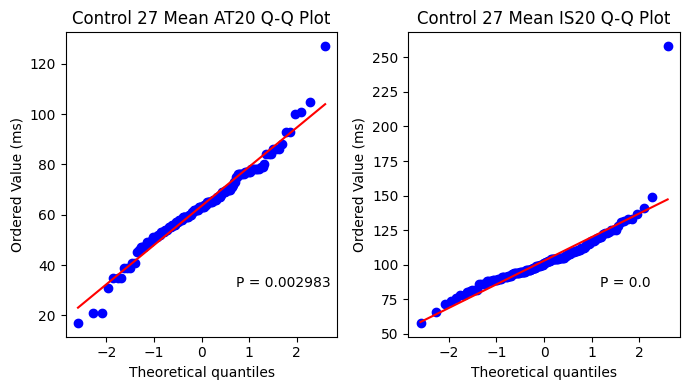

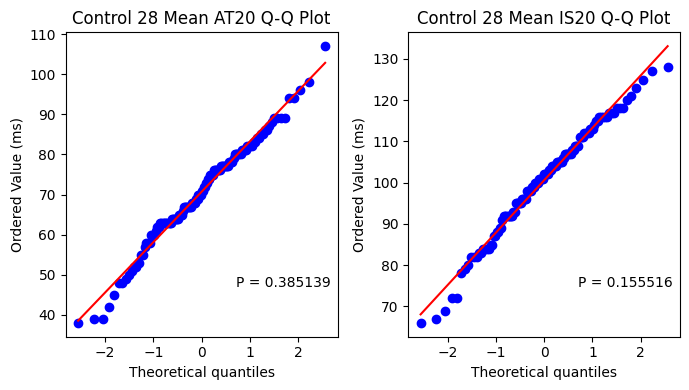

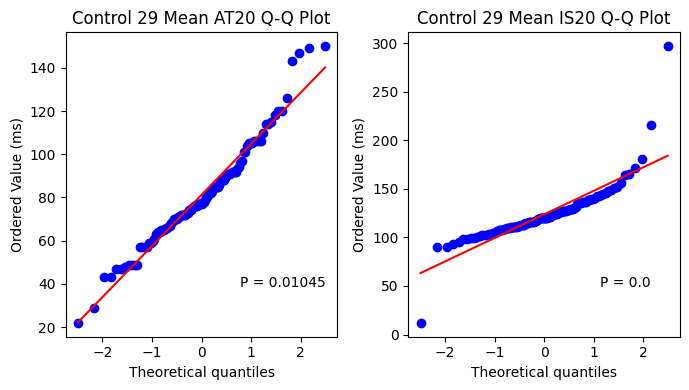

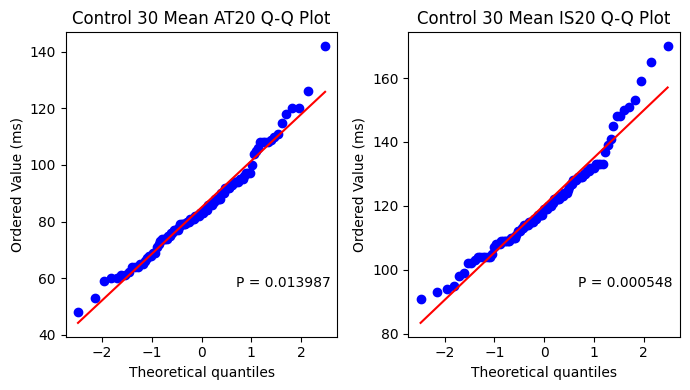

In [9]:
at20_nt_list = []
is20_nt_list = []


for i in range (1,31):
    s_df = pd.read_csv(path+ "s" + str(i) +"_r.csv")
    at20_col = "at20_s"+str(i)+"_r"
    is20_col = "is20_s"+str(i)+"_r"
    
    stat_at20, p_value_at20 = normaltest(s_df[at20_col])
    stat_is20, p_value_is20 = normaltest(s_df[is20_col])

    txt1 = "P = " + str(round(p_value_at20,6))
    txt2 = "P = " + str(round(p_value_is20,6))
    
    if p_value_at20< np.float64(0.05):
        at20_nt_list.append(False)
    else:
        at20_nt_list.append(True)
        
        
    if p_value_is20< np.float64(0.05):
        is20_nt_list.append(False)
    else:
        is20_nt_list.append(True)
    
    fig = plt.figure(figsize=(7, 4))
    gs = gridspec.GridSpec(1,2, figure=fig)    
    
    ax1 = fig.add_subplot(gs[0,0])
    stats.probplot(s_df[at20_col], dist= "norm", plot = ax1)
    ax1.text(0.8, 0.20, txt1, transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
    ax1.set_title("Control " + str(i) + " Mean AT20 Q-Q Plot")
    ax1.set_ylabel("Ordered Value (ms)")
    
    ax2 = fig.add_subplot(gs[0,1])
    stats.probplot(s_df[is20_col], dist= "norm", plot = ax2)
    ax2.text(0.8, 0.20, txt2, transform=ax2.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
    ax2.set_title("Control " + str(i) + " Mean IS20 Q-Q Plot")
    ax2.set_ylabel("Ordered Value (ms)")
    
    plt.tight_layout()
    plt.savefig(path_results + "c_at_is_qq_" + str(i) +".jpg")
    plt.show()
    

Seeing how many normal distributions for each column of each control

In [10]:
print(is20_nt_list.count(True))
print(at20_nt_list.count(True))

8
15


In [11]:
df_control["is20_normal"] = is20_nt_list
df_control["at20_normal"] = at20_nt_list

## Patient Data handling 

#### 7. Making the patient demograhpic dataframe

In [12]:
df_demo_pt = pd.read_csv(path + "patient_demographic_data.csv")
df_demo_pt.set_index("subject_no", inplace=True)
df_demo_pt.head()

gender  age 
subject_no             
1               F    56
2               F    49
3               M    64
4               M    61
5               M    52

#### 8. Reading patients data

In [13]:
mean_at20 = []
std_at20 = []
median_at20 = []
iqr_at20 = []
mean_is20 = []
std_is20 = []
median_is20 = []
iqr_is20 = []
ks20 = []

for i in range (1,24):
    df = pd.read_csv(path + 'p' + str(i) + '_r.csv')
    at20_column = "at20_p" + str(i) + "_r"
    is20_column = "is20_p" + str(i) + "_r"

    mean_at20.append(df[at20_column].mean())
    std_at20.append(df[at20_column].std())
    median_at20.append(df[at20_column].median())
    iqr_at20.append(iqr(df[at20_column]))
    
    mean_is20.append(df[is20_column].mean())
    std_is20.append(df[is20_column].std())
    median_is20.append(df[is20_column].median())
    iqr_is20.append(iqr(df[is20_column]))

    ks20.append(len(df))


#### 9. Making the datagrame from the descriptive stats of the patients data

In [14]:
dataframe = {'mean_at20': mean_at20, 
             'std_at20': std_at20,
             'median_at20': median_at20,
             'iqr_at20': iqr_at20,
             'mean_is20': mean_is20,
             'std_is20': std_is20,
             'median_is20': median_is20,
             'iqr_is20': iqr_is20,
             'ks20': ks20,
             'gender': df_demo_pt["gender"],
             'age': df_demo_pt["age "]
             }
df_patient = pd.DataFrame(dataframe)
# df_patient.set_index(inplace=True)
df_patient.tail()

mean_at20   std_at20  median_at20   iqr_at20   mean_is20  \
subject_no                                                             
19          87.337047  17.960150    85.814232  24.629601  158.752297   
20          89.062125  19.762066    90.374931  27.290244  158.549731   
21          93.131541  17.716937    91.999321  21.334099  160.759647   
22          92.099152  17.696302    93.748461  23.450399  156.662577   
23          87.658819  19.586619    89.959995  29.161017  150.790194   

             std_is20  median_is20   iqr_is20  ks20 gender  age  
subject_no                                                       
19          36.698898   152.527540  43.521643    78      M   59  
20          41.633986   159.739999  63.615827   108      M   75  
21          42.187403   160.563098  64.991530    76      F   65  
22          41.294866   157.395915  46.827855   106      M   59  
23          40.037990   156.883805  56.828551   102      M   71

In [15]:
df_patient.describe()

mean_at20   std_at20  median_at20   iqr_at20   mean_is20   std_is20  \
count  23.000000  23.000000    23.000000  23.000000   23.000000  23.000000   
mean   88.545449  19.063348    88.477619  25.810706  157.232926  42.050105   
std     1.915462   1.594887     2.551413   3.524162    4.113195   3.232817   
min    85.645742  16.077521    83.176989  19.548101  150.790194  36.698898   
25%    87.224929  17.672001    86.514976  23.725086  154.728767  39.763983   
50%    88.111495  19.089935    88.607639  25.609845  156.868778  41.633986   
75%    89.449174  20.125849    90.184530  28.543436  158.875244  43.787505   
max    93.131541  21.752095    93.748461  31.867772  168.759344  48.772509   

       median_is20   iqr_is20        ks20        age  
count    23.000000  23.000000   23.000000  23.000000  
mean    156.411461  55.871297   91.478261  66.739130  
std       5.173785   6.811822   10.887314  10.331846  
min     142.412471  43.521643   72.000000  49.000000  
25%     153.426552  51.162804   85.500000  59.000000  
50%     156.883805  56.828551   94.000000  65.000000  
75%     160.142931  59.931919   98.500000  74.500000  
max     166.199060  70.451779  108.000000  85.000000

#### 10. Patients KS20 Parameter normality test and visualization

0.4677252242271063


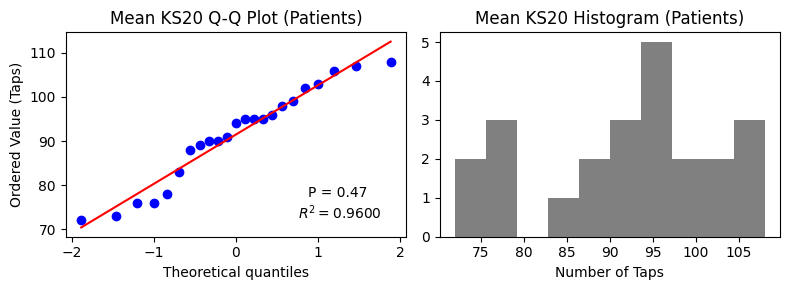

In [16]:
test_stat, pval = normaltest(df_patient["ks20"])
print(pval)

txt = "P = " +str(round(pval,2))

fig = plt.figure(figsize=(8, 3))
gs = gridspec.GridSpec(1,2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
stats.probplot(df_patient["ks20"], dist= "norm", plot = ax1, rvalue=True)
ax1.text(0.8, 0.25, txt, transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
ax1.set_title("Mean KS20 Q-Q Plot (Patients)")
ax1.set_ylabel("Ordered Value (Taps)")

ax2 = fig.add_subplot(gs[0,1])
plt.hist(df_patient["ks20"], color="gray")
ax2.set_title("Mean KS20 Histogram (Patients)")
ax2.set_xlabel("Number of Taps")

plt.tight_layout()
plt.savefig(path_results + "ks20_patients.jpg")
plt.show()


#### 11. QQ Plots for patients AT20 and IS20

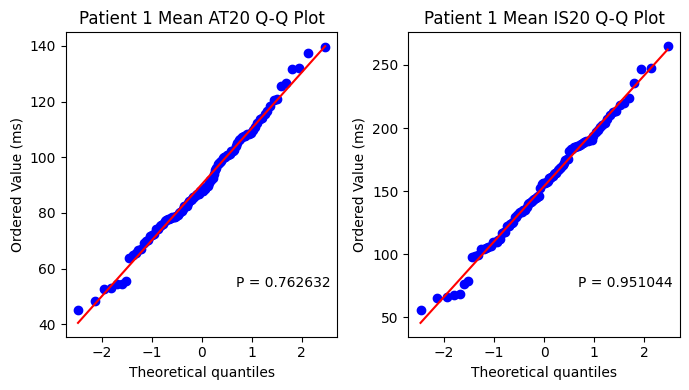

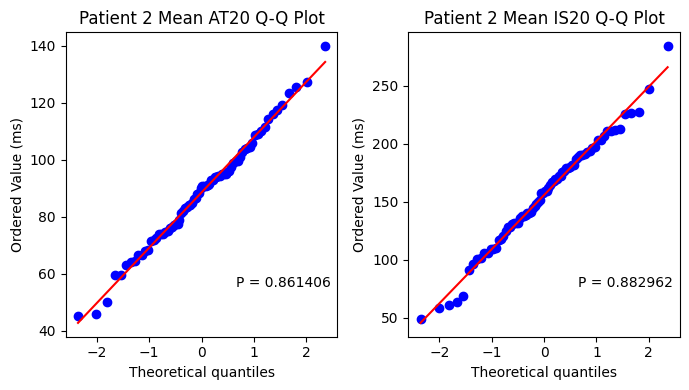

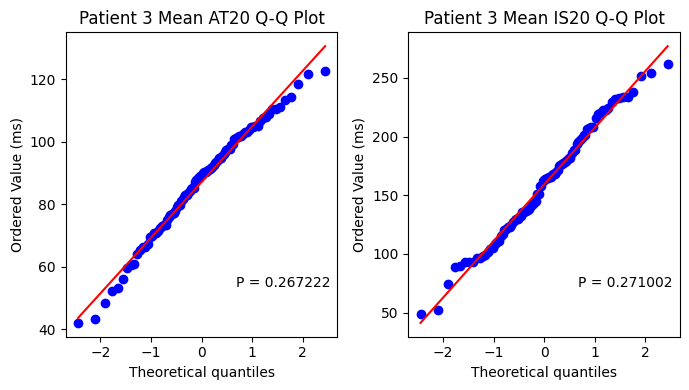

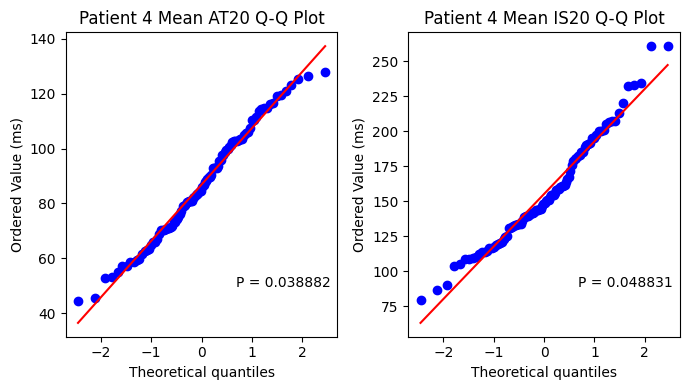

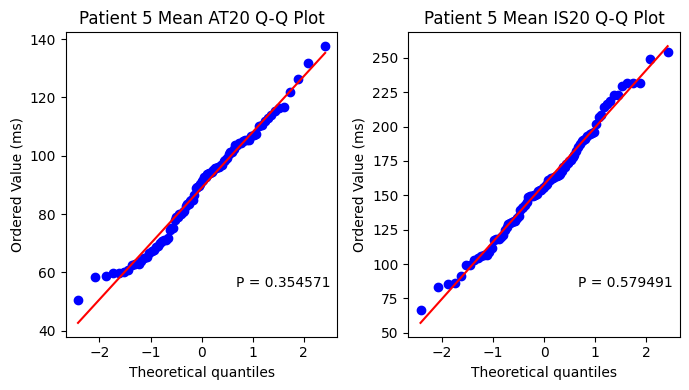

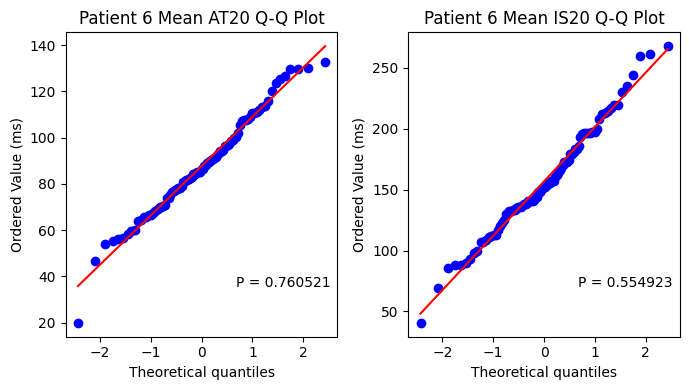

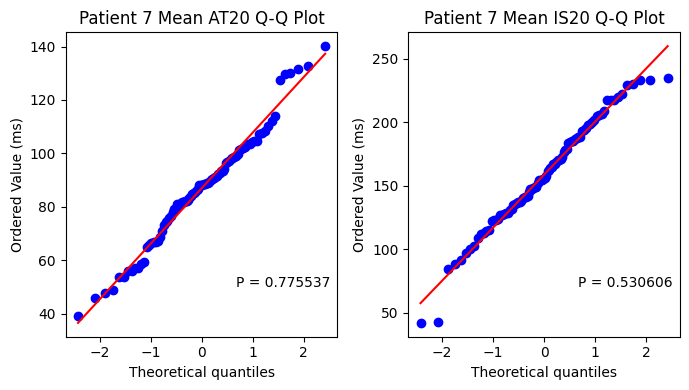

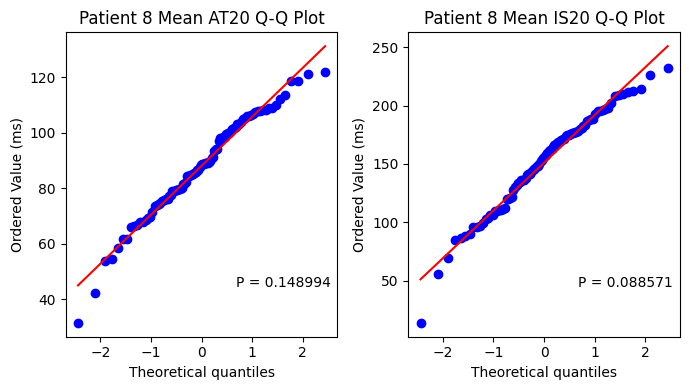

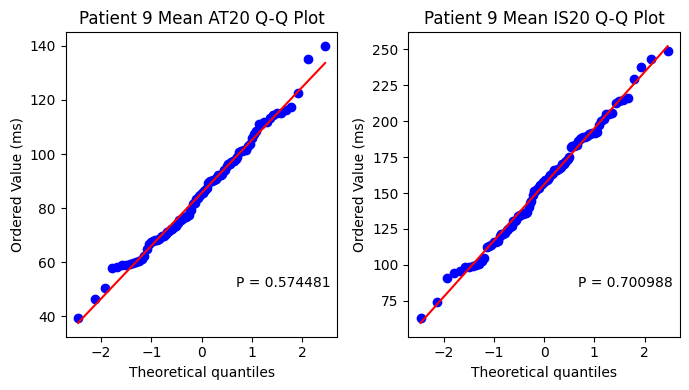

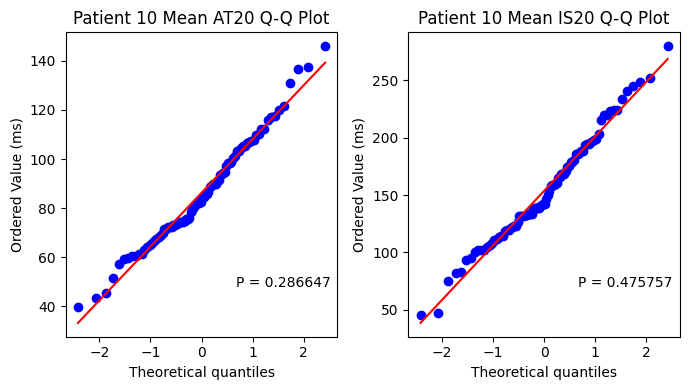

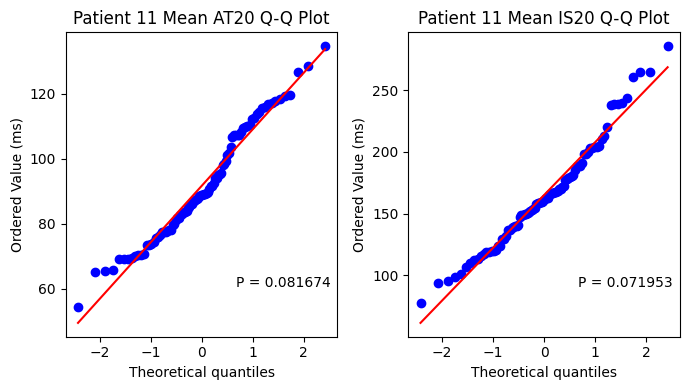

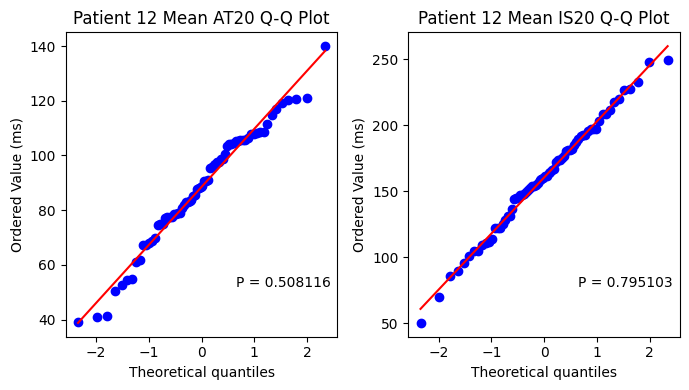

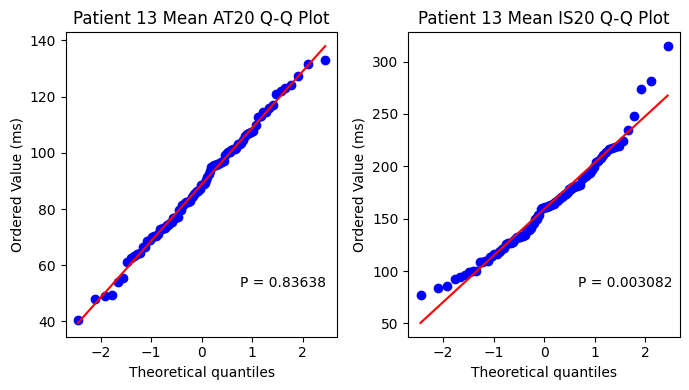

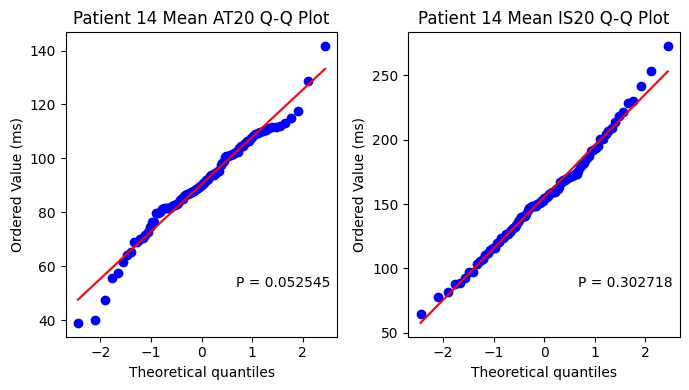

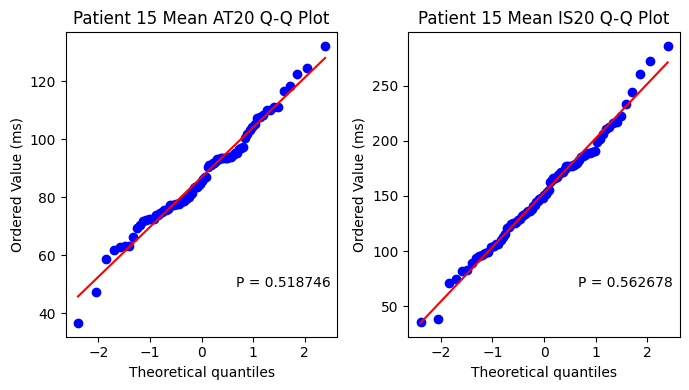

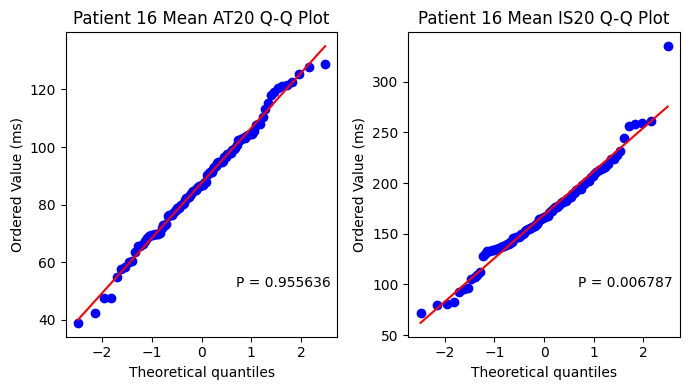

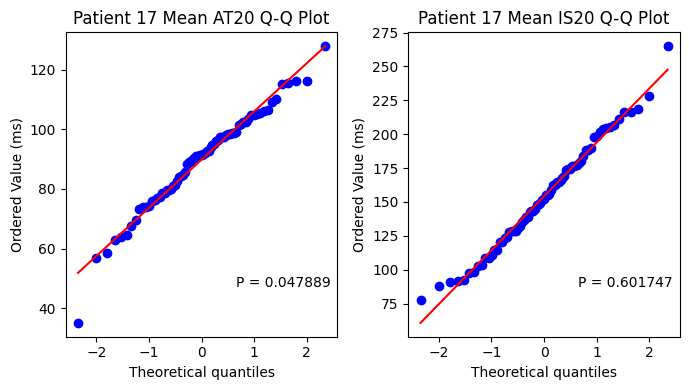

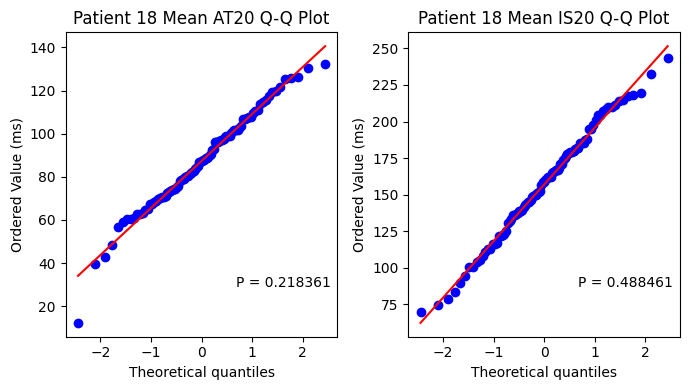

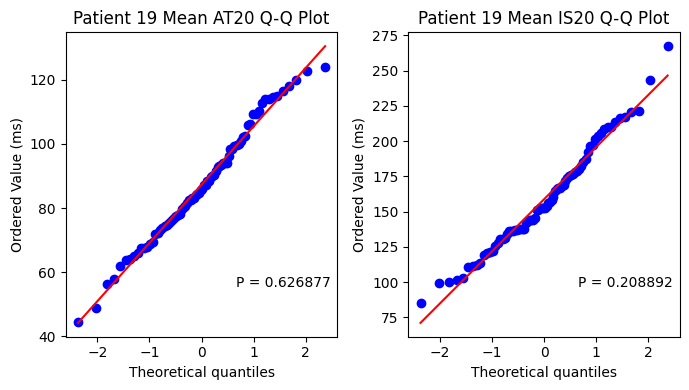

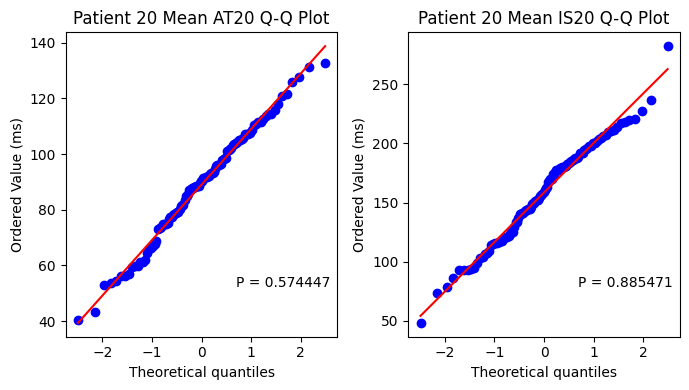

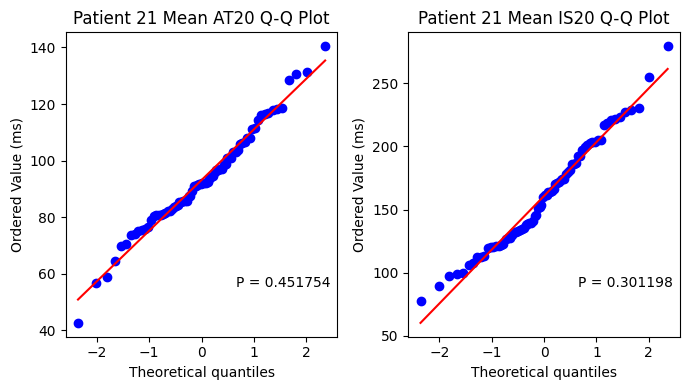

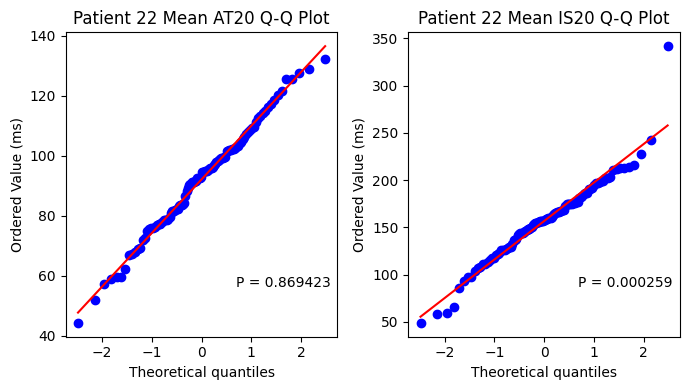

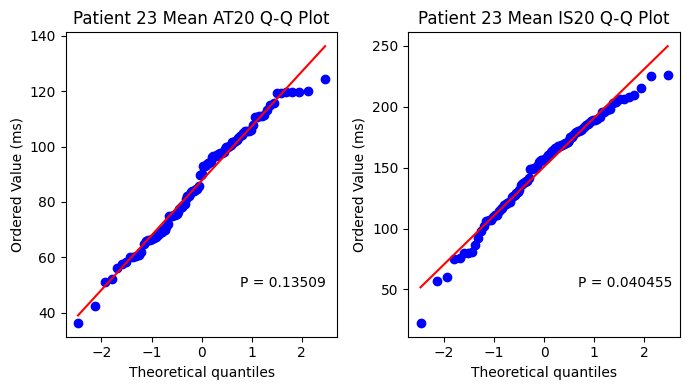

In [17]:
at20_nt_list_pt = []
is20_nt_list_pt = []

for i in range (1,24):
    p_df = pd.read_csv(path+ "p" + str(i) +"_r.csv")
    at20_col = "at20_p"+str(i)+"_r"
    is20_col = "is20_p"+str(i)+"_r"
    
    stat_at20, p_value_at20 = normaltest(p_df[at20_col])
    stat_is20, p_value_is20 = normaltest(p_df[is20_col])

    txt1 = "P = " + str(round(p_value_at20,6))
    txt2 = "P = " + str(round(p_value_is20,6))
    
    if p_value_at20< np.float64(0.05):
        at20_nt_list_pt.append(False)
    else:
        at20_nt_list_pt.append(True)
        
        
    if p_value_is20< np.float64(0.05):
        is20_nt_list_pt.append(False)
    else:
        is20_nt_list_pt.append(True)
    
    fig = plt.figure(figsize=(7, 4))
    gs = gridspec.GridSpec(1,2, figure=fig)    
    
    ax1 = fig.add_subplot(gs[0,0])
    stats.probplot(p_df[at20_col], dist= "norm", plot = ax1)
    ax1.text(0.8, 0.20, txt1, transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
    ax1.set_title("Patient " + str(i) + " Mean AT20 Q-Q Plot")
    ax1.set_ylabel("Ordered Value (ms)")
    
    ax2 = fig.add_subplot(gs[0,1])
    stats.probplot(p_df[is20_col], dist= "norm", plot = ax2)
    ax2.text(0.8, 0.20, txt2, transform=ax2.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
    ax2.set_title("Patient " + str(i) + " Mean IS20 Q-Q Plot")
    ax2.set_ylabel("Ordered Value (ms)")
    
    plt.tight_layout()
    plt.savefig(path_results + "p_at_is_qq_" + str(i) +".jpg")
    plt.show()
    

Seeing how many normal distributions for each column of each Patient

In [18]:
print(is20_nt_list_pt.count(True))
print(at20_nt_list_pt.count(True))

18
21


In [19]:
df_patient["is20_normal"] = is20_nt_list_pt
df_patient["at20_normal"] = at20_nt_list_pt

## Statistical Comparison Analysis

In [20]:
df_patient.dtypes

mean_at20      float64
std_at20       float64
median_at20    float64
iqr_at20       float64
mean_is20      float64
std_is20       float64
median_is20    float64
iqr_is20       float64
ks20             int64
gender          object
age              int64
is20_normal       bool
at20_normal       bool
dtype: object

#### 1. Mannwhitney U test on 3 parameters

In [21]:
stat, pval = mannwhitneyu(df_control["ks20"], df_patient["ks20"],alternative="two-sided")
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between patients and controls based on KS20 is statistically significant")
else:
    print("NOT significant")

P = 2.5128757696396413e-09
Difference between patients and controls based on KS20 is statistically significant


In [22]:
stat, pval = mannwhitneyu(df_control["mean_at20"], df_patient["mean_at20"],alternative="two-sided")
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between patients and controls based on AT20 is statistically significant")
else:
    print("NOT significant")

P = 6.937121831714239e-08
Difference between patients and controls based on AT20 is statistically significant


In [23]:
stat, pval = mannwhitneyu(df_control["mean_is20"], df_patient["mean_is20"],alternative="two-sided")
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between patients and controls based on IS20 is statistically significant")
else:
    print("NOT significant")

P = 5.175038776187701e-09
Difference between patients and controls based on IS20 is statistically significant


#### 2. Kolmogorov Smirnov test on 3 parameters

In [24]:
stat, pval = ks_2samp(df_control["ks20"], df_patient["ks20"])
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between patients and controls based on KS20 is statistically significant")
else:
    print("NOT significant")

P = 1.220748816676111e-10
Difference between patients and controls based on KS20 is statistically significant


In [25]:
stat, pval = ks_2samp(df_control["mean_at20"], df_patient["mean_at20"])
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between patients and controls based on AT20 is statistically significant")
else:
    print("NOT significant")

P = 1.052286699087447e-12
Difference between patients and controls based on AT20 is statistically significant


In [26]:
stat, pval = ks_2samp(df_control["mean_is20"], df_patient["mean_is20"])
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between patients and controls based on AT20 is statistically significant")
else:
    print("NOT significant")

P = 1.052286699087447e-12
Difference between patients and controls based on AT20 is statistically significant


## Statistical Comparison Visualization

In [27]:
df_control.columns

Index(['mean_at20', 'std_at20', 'median_at20', 'iqr_at20', 'mean_is20',
       'std_is20', 'median_is20', 'iqr_is20', 'ks20', 'gender', 'age',
       'is20_normal', 'at20_normal'],
      dtype='object')

#### Barplot with overlayed datapoints

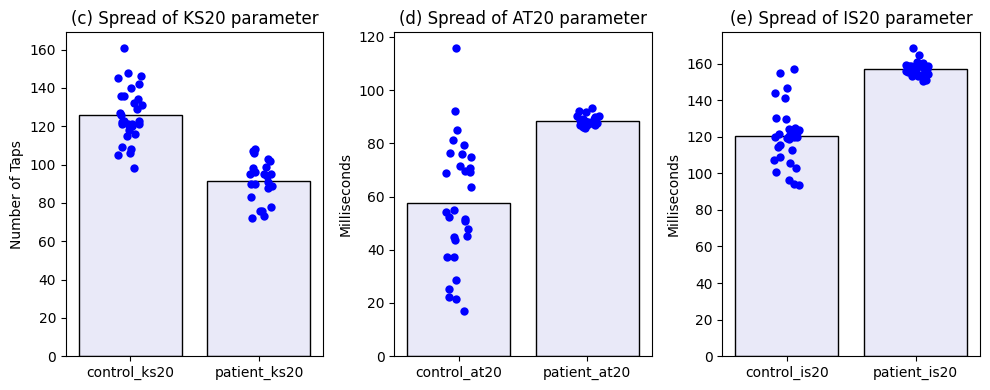

In [28]:
dataframe = {"control_at20": df_control["mean_at20"],
             "patient_at20": df_patient["mean_at20"],
             "control_is20": df_control["mean_is20"],
             "patient_is20": df_patient["mean_is20"],
             "control_ks20": df_control["ks20"],
             "patient_ks20": df_patient["ks20"]
            }   
df_temp = pd.DataFrame(dataframe)

# Create melted DataFrames for each pair of variables
df_melted_1 = df_temp[['control_at20', 'patient_at20']].melt(var_name='Category', value_name='Values')
df_melted_2 = df_temp[['control_is20', 'patient_is20']].melt(var_name='Category', value_name='Values')
df_melted_3 = df_temp[['control_ks20', 'patient_ks20']].melt(var_name='Category', value_name='Values')

summary_stats_1 = df_melted_1.groupby('Category')['Values'].agg(['mean', 'count', 'std']).reset_index()
summary_stats_2 = df_melted_2.groupby('Category')['Values'].agg(['mean', 'count', 'std']).reset_index()
summary_stats_3 = df_melted_3.groupby('Category')['Values'].agg(['mean', 'count', 'std']).reset_index()

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1])  

ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(x='Category', y='mean', data=summary_stats_1, color='lavender', edgecolor='black', ax=ax1)
sns.stripplot(x='Category', y='Values', data=df_melted_1, marker="o", color='blue', jitter=True, size=6, edgecolor="black", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Milliseconds")
ax1.set_title("(d) Spread of AT20 parameter")

ax2 = fig.add_subplot(gs[0, 2])
sns.barplot(x='Category', y='mean', data=summary_stats_2, color='lavender', edgecolor='black', ax=ax2)
sns.stripplot(x='Category', y='Values', data=df_melted_2, marker="o", color='blue', jitter=True, size=6, edgecolor="black", ax=ax2)
ax2.set_xlabel("")
ax2.set_ylabel("Milliseconds")
ax2.set_title("(e) Spread of IS20 parameter")

ax3 = fig.add_subplot(gs[0, 0])
sns.barplot(x='Category', y='mean', data=summary_stats_3, color='lavender', edgecolor='black', ax=ax3)
sns.stripplot(x='Category', y='Values', data=df_melted_3, marker="o", color='blue', jitter=True, size=6, edgecolor="black", ax=ax3)
ax3.set_xlabel("")
ax3.set_ylabel("Number of Taps")
ax3.set_title("(c) Spread of KS20 parameter")

# Adjust layout
plt.tight_layout()
plt.savefig(path_results + "Overlayed Barplot.jpg")
plt.show()

#### Lineplot of metrices

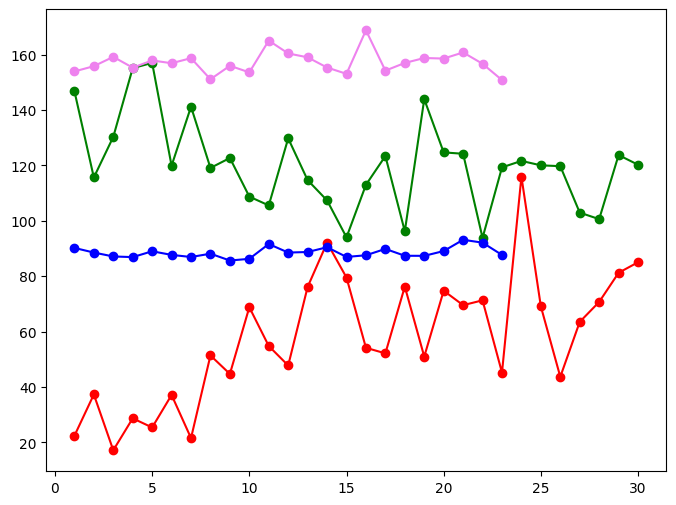

In [29]:
plt.figure(figsize=(8,6))
plt.plot(df_control["mean_at20"], color="red", marker = "o")
plt.plot(df_control["mean_is20"], color="green",marker = "o")
plt.plot(df_patient["mean_at20"], color="blue",marker = "o")
plt.plot(df_patient["mean_is20"], color="violet",marker = "o")

#### Scatterplot of metrices

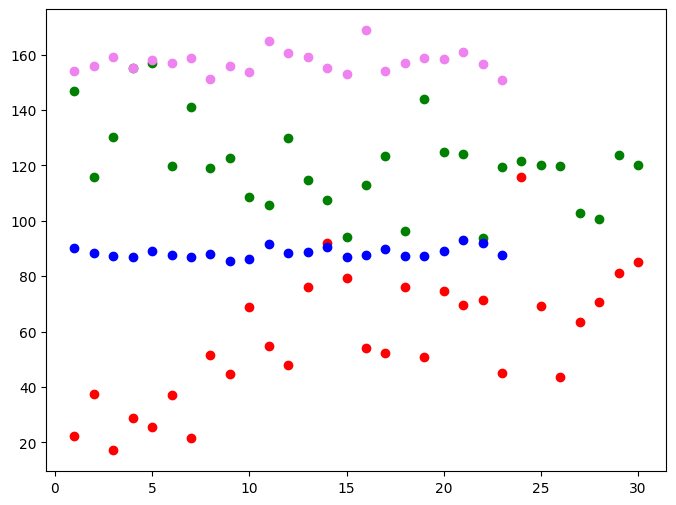

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(df_control.index, df_control["mean_at20"], color="red")
plt.scatter(df_control.index, df_control["mean_is20"], color="green")
plt.scatter(df_patient.index,df_patient["mean_at20"], color="blue")
plt.scatter(df_patient.index, df_patient["mean_is20"], color="violet")

## Control Left Hand Data Handling

#### 3. Reading Control left hand data
For each control data, there are 2 columns <br>
For each column, the descriptive stat is calculated

In [31]:
mean_at20 = []
std_at20 = []
median_at20 = []
iqr_at20 = []
mean_is20 = []
std_is20 = []
median_is20 = []
iqr_is20 = []
ks20 = []

for i in range (11,31):
    df = pd.read_csv(path + 's' + str(i) + '_l.csv')
    at20_column = "at20_s" + str(i) + "_l"
    is20_column = "is20_" + str(i) + "_l"

    mean_at20.append(df[at20_column].mean())
    std_at20.append(df[at20_column].std())
    median_at20.append(df[at20_column].median())
    iqr_at20.append(iqr(df[at20_column]))
    
    mean_is20.append(df[is20_column].mean())
    std_is20.append(df[is20_column].std())
    median_is20.append(df[is20_column].median())
    iqr_is20.append(iqr(df[is20_column]))

    ks20.append(len(df))


#### 4. Making the dataframe from the descriptive stats of each control data

In [32]:
dataframe = {'mean_at20': mean_at20, 
             'std_at20': std_at20,
             'median_at20': median_at20,
             'iqr_at20': iqr_at20,
             'mean_is20': mean_is20,
             'std_is20': std_is20,
             'median_is20': median_is20,
             'iqr_is20': iqr_is20,
             'ks20': ks20
             }
df_control_left = pd.DataFrame(dataframe)
df_control_left.tail()

mean_at20   std_at20  median_at20  iqr_at20   mean_is20   std_is20  \
15  61.438462  15.848607         60.5     21.00  122.207692  28.980265   
16  64.203125  18.017646         63.0     22.00  110.000000  23.075364   
17  94.159292  16.796878         97.0     22.00   98.097345  20.501291   
18  68.151261  10.621084         68.0     13.50  110.915966  13.403503   
19  87.610000  15.192299         85.5     17.25  136.770000  17.156355   

    median_is20  iqr_is20  ks20  
15        119.5     36.75   130  
16        107.0     24.25   128  
17         95.0     24.00   113  
18        111.0     20.50   119  
19        137.5     21.25   100

In [33]:
df_control_left.describe()

mean_at20   std_at20  median_at20   iqr_at20   mean_is20   std_is20  \
count   20.000000  20.000000    20.000000  20.000000   20.000000  20.000000   
mean    75.542406  17.261982    75.275000  21.350000  120.174800  24.238185   
std     16.242162   4.729094    16.241982   5.753946   20.056905   7.106202   
min     47.305785  10.567910    48.000000  12.000000   84.614173  12.837227   
25%     63.491295  14.031130    62.500000  17.812500  109.498738  20.157602   
50%     70.524769  16.494300    72.000000  20.750000  120.086302  24.798687   
75%     89.794657  20.209968    89.000000  24.375000  130.351278  26.757971   
max    104.443396  27.470882   101.500000  33.750000  183.676768  38.905582   

       median_is20   iqr_is20        ks20  
count    20.000000  20.000000   20.000000  
mean    117.925000  22.512500  117.400000  
std      20.444582   5.919679   10.363905  
min      84.000000  13.000000   99.000000  
25%     106.750000  19.437500  110.750000  
50%     117.500000  22.000000  116.500000  
75%     128.250000  24.000000  123.250000  
max     182.000000  36.750000  139.000000

#### 5. Controls' KS20 paramter normality test and visulization

0.964079914491547


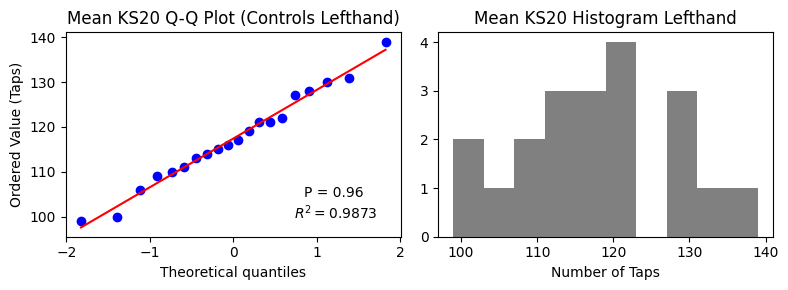

In [34]:
test_stat, pval = normaltest(df_control_left["ks20"])
print(pval)

txt = "P = " +str(round(pval,2))

fig = plt.figure(figsize=(8, 3))
gs = gridspec.GridSpec(1,2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
stats.probplot(df_control_left["ks20"], dist= "norm", plot = ax1, rvalue=True)
ax1.text(0.8, 0.25, txt, transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
ax1.set_title("Mean KS20 Q-Q Plot (Controls Lefthand)")
ax1.set_ylabel("Ordered Value (Taps)")

ax2 = fig.add_subplot(gs[0,1])
plt.hist(df_control_left["ks20"], color="gray")
ax2.set_title("Mean KS20 Histogram Lefthand")
ax2.set_xlabel("Number of Taps")

plt.tight_layout()
plt.savefig(path_results + "ks20_control_left.jpg")
plt.show()


#### 6. QQ plots for controls AT20 and IS20

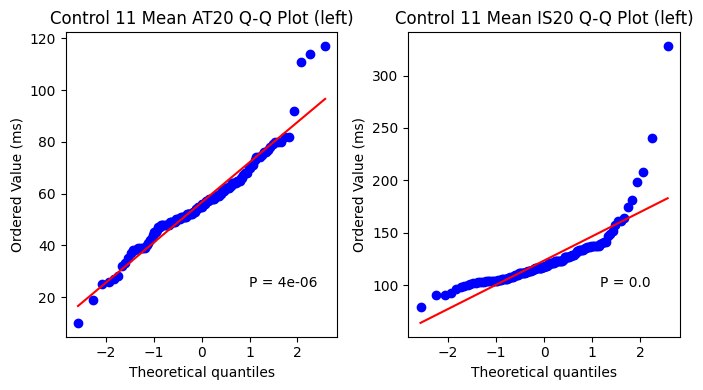

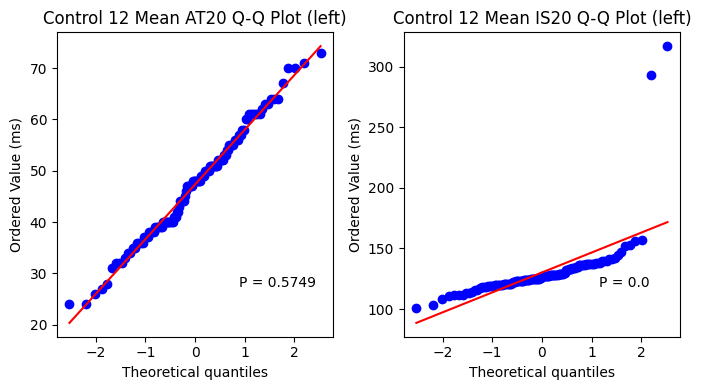

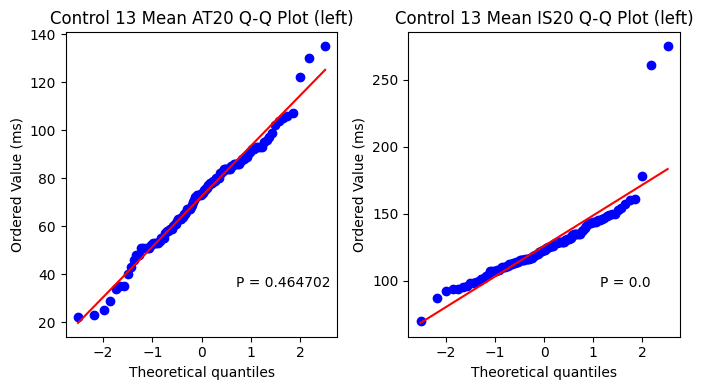

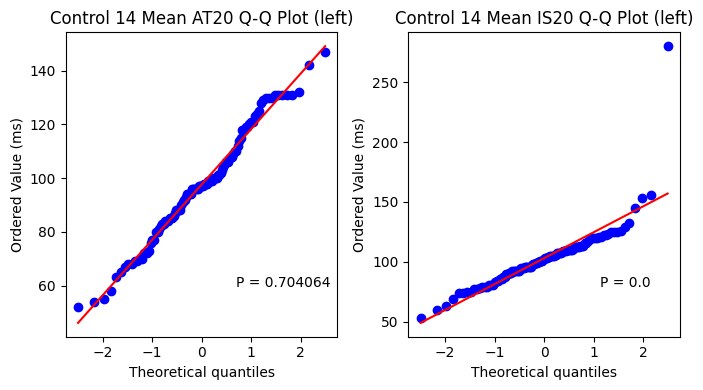

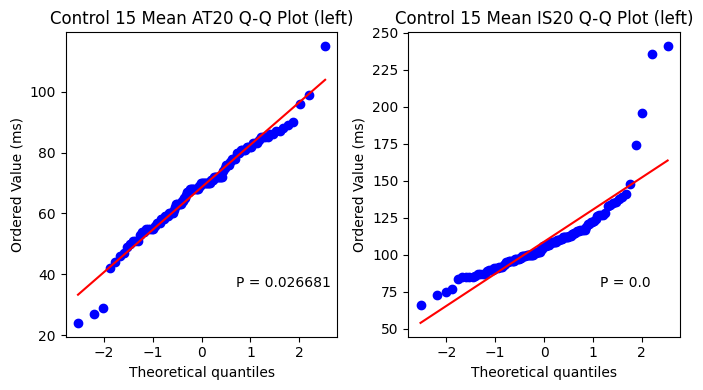

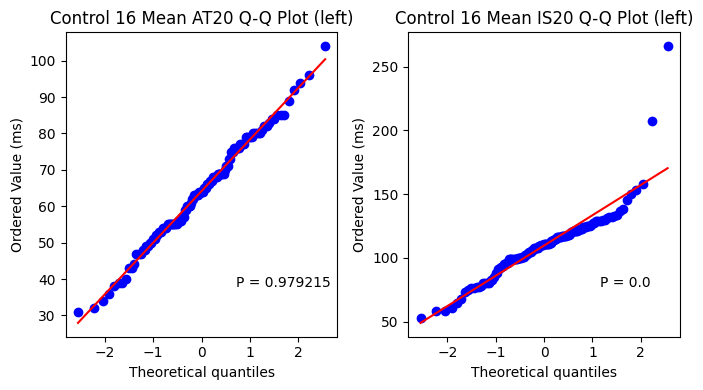

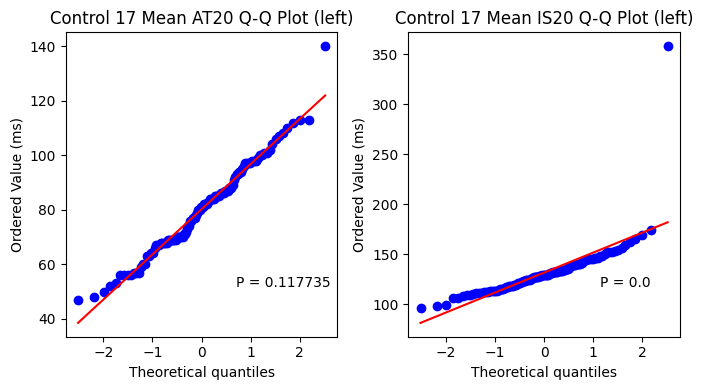

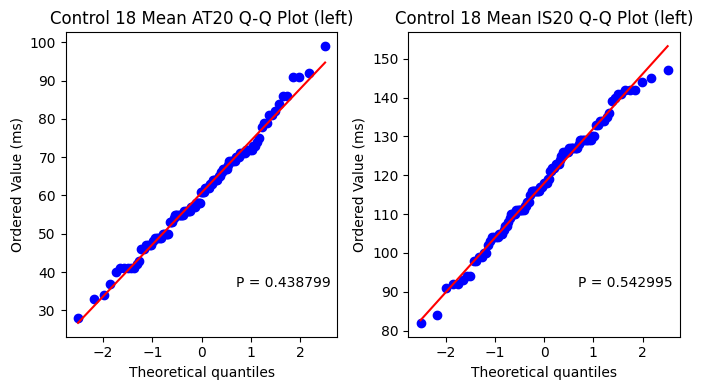

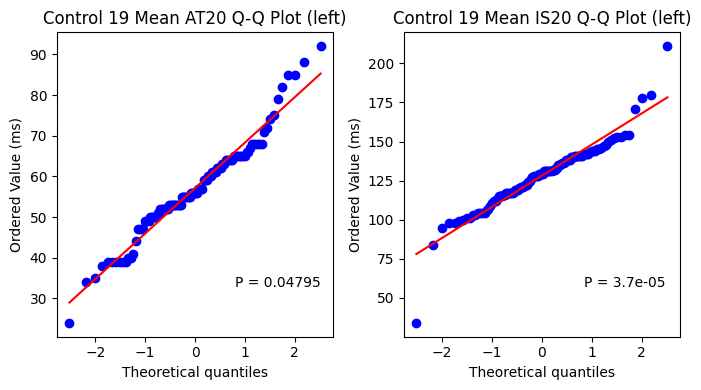

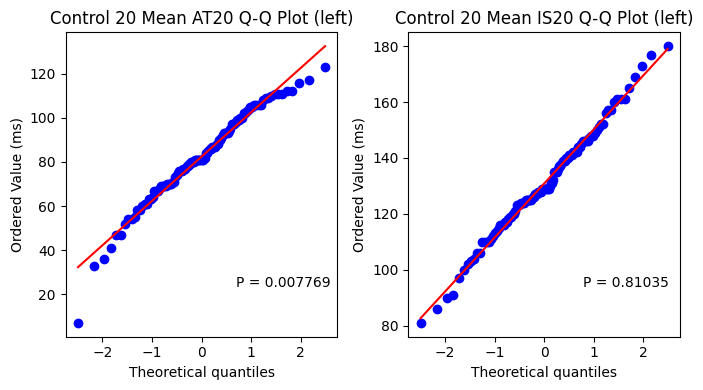

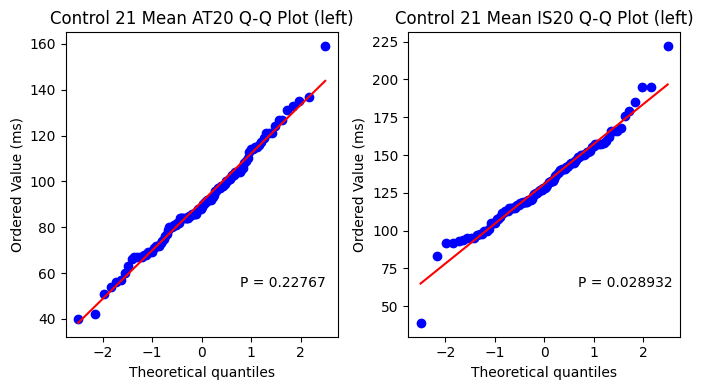

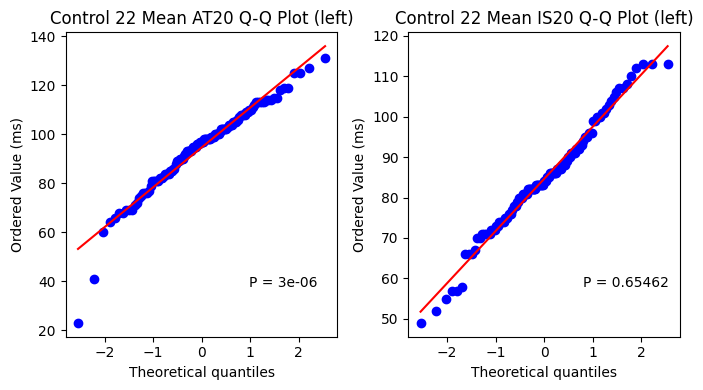

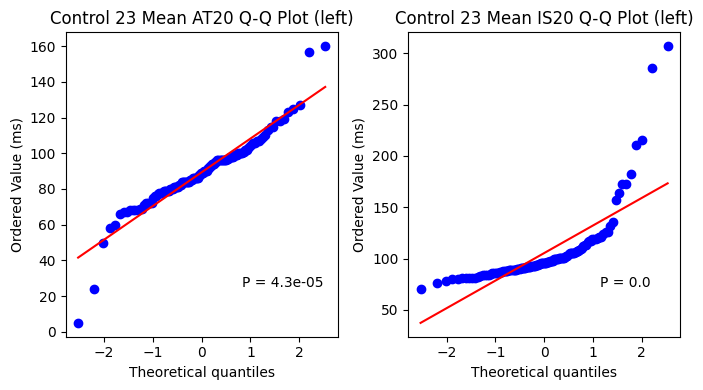

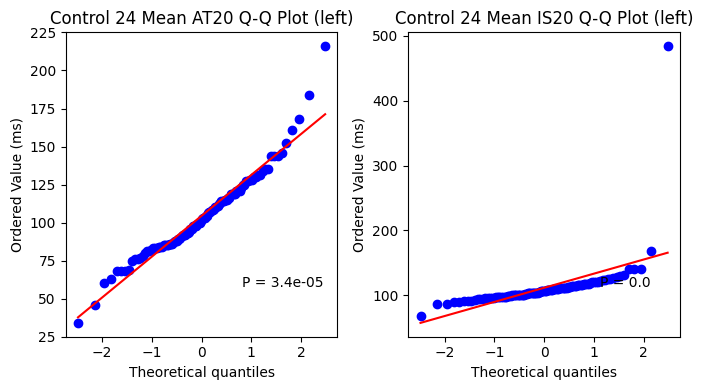

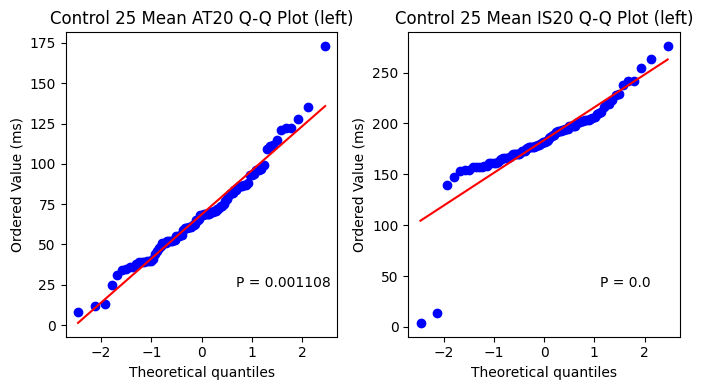

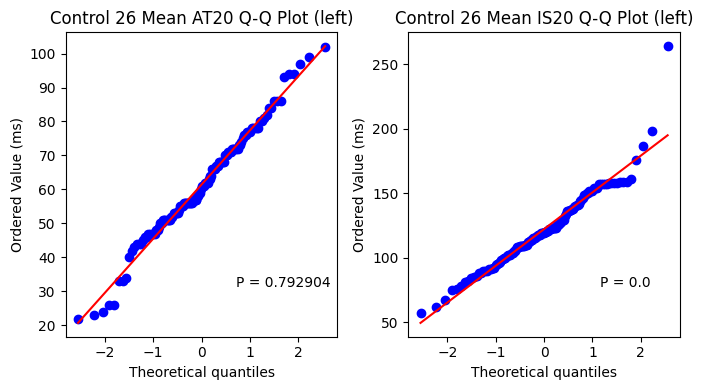

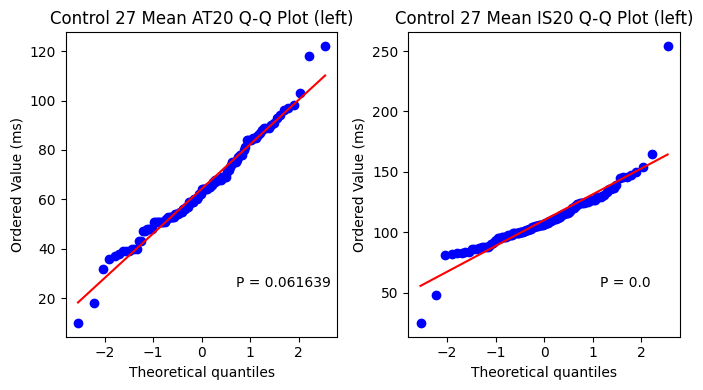

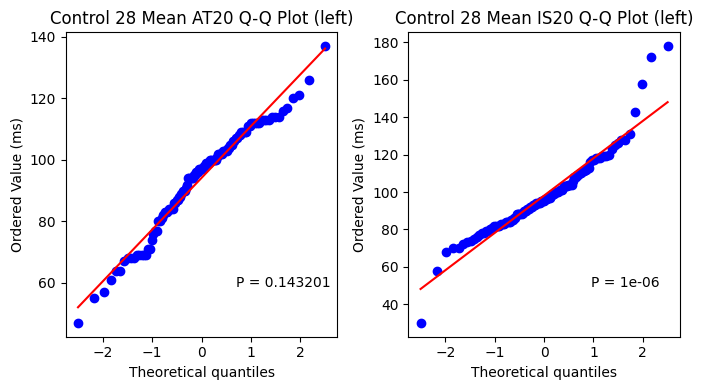

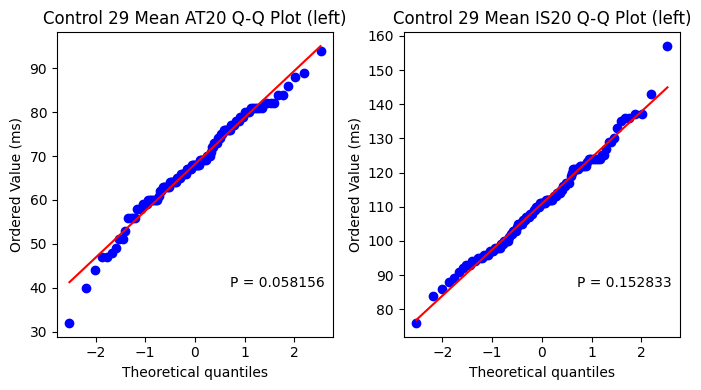

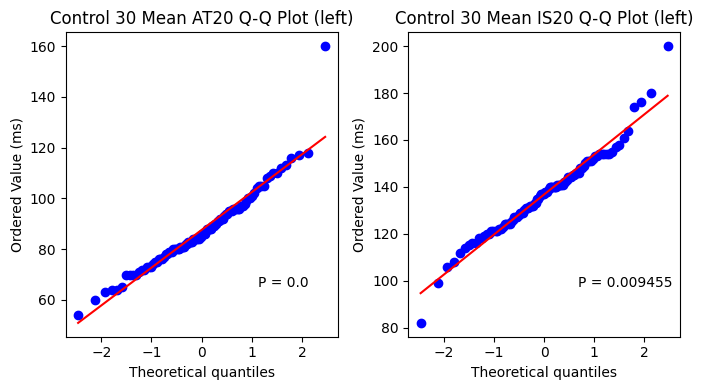

In [35]:
at20_nt_list = []
is20_nt_list = []

for i in range (11,31):
    s_df = pd.read_csv(path+ "s" + str(i) +"_l.csv")
    at20_col = "at20_s"+str(i)+"_l"
    is20_col = "is20_"+str(i)+"_l"
    
    stat_at20, p_value_at20 = normaltest(s_df[at20_col])
    stat_is20, p_value_is20 = normaltest(s_df[is20_col])

    txt1 = "P = " + str(round(p_value_at20,6))
    txt2 = "P = " + str(round(p_value_is20,6))
    
    if p_value_at20< np.float64(0.05):
        at20_nt_list.append(False)
    else:
        at20_nt_list.append(True)
        
        
    if p_value_is20< np.float64(0.05):
        is20_nt_list.append(False)
    else:
        is20_nt_list.append(True)
    
    fig = plt.figure(figsize=(7, 4))
    gs = gridspec.GridSpec(1,2, figure=fig)    
    
    ax1 = fig.add_subplot(gs[0,0])
    stats.probplot(s_df[at20_col], dist= "norm", plot = ax1)
    ax1.text(0.8, 0.20, txt1, transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
    ax1.set_title("Control " + str(i) + " Mean AT20 Q-Q Plot (left)")
    ax1.set_ylabel("Ordered Value (ms)")
    
    ax2 = fig.add_subplot(gs[0,1])
    stats.probplot(s_df[is20_col], dist= "norm", plot = ax2)
    ax2.text(0.8, 0.20, txt2, transform=ax2.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
    ax2.set_title("Control " + str(i) + " Mean IS20 Q-Q Plot (left)")
    ax2.set_ylabel("Ordered Value (ms)")
    
    plt.tight_layout()
    plt.savefig(path_results + "c_at_is_qq_left_" + str(i) +".jpg")
    plt.show()
    

Seeing how many normal distributions for each column of each control

In [36]:
print(is20_nt_list.count(True))
print(at20_nt_list.count(True))

4
11


In [37]:
df_control_left["is20_normal"] = is20_nt_list
df_control_left["at20_normal"] = at20_nt_list

## EXTRA Stat Comparison (Left vs Right)

#### 1. Mannwhitney U test on 3 parameters

In [38]:
stat, pval = mannwhitneyu(df_control["ks20"], df_control_left["ks20"],alternative="two-sided")
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between controls left and right hand based on KS20 is statistically significant")
else:
    print("NOT significant")

P = 0.02921083291919713
Difference between controls left and right hand based on KS20 is statistically significant


In [39]:
stat, pval = mannwhitneyu(df_control["mean_at20"], df_control_left["mean_at20"],alternative="two-sided")
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between controls left and right hand based on AT20 is statistically significant")
else:
    print("NOT significant")

P = 0.008200677074520778
Difference between controls left and right hand based on AT20 is statistically significant


In [40]:
stat, pval = mannwhitneyu(df_control["mean_is20"], df_control_left["mean_is20"],alternative="two-sided")
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between controls left and right hand based on IS20 is statistically significant")
else:
    print("NOT significant")

P = 0.9920998947123189
NOT significant


#### 2. Kolmogorov Smirnov test on 3 parameters

In [41]:
stat, pval = ks_2samp(df_control["ks20"], df_control_left["ks20"])
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between controls left and right hand based on KS20 is statistically significant")
else:
    print("NOT significant")

P = 0.11901288467516954
NOT significant


In [42]:
stat, pval = ks_2samp(df_control["mean_at20"], df_control_left["mean_at20"])
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between controls left and right hand based on AT20 is statistically significant")
else:
    print("NOT significant")

P = 0.005151486674193562
Difference between controls left and right hand based on AT20 is statistically significant


In [43]:
stat, pval = ks_2samp(df_control["mean_is20"], df_control_left["mean_is20"])
print("P = " + str(pval))

if pval < 0.05:
    print("Difference between controls left and right hand based on AT20 is statistically significant")
else:
    print("NOT significant")

P = 0.7715022396637633
NOT significant


## EXTRA Statistical Comparison Visualization (Left vs Right)

#### Barplot with overlayed datapoints and CI

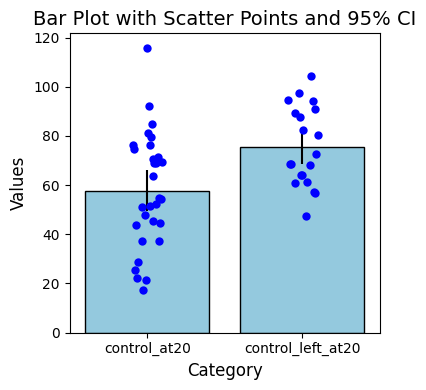

In [44]:
dataframe = {"control_at20": df_control["mean_at20"],
             "control_left_at20": df_control_left["mean_at20"],
             "control_is20": df_control["mean_is20"],
             "control_left_is20": df_control_left["mean_is20"],
             "control_ks20": df_control["ks20"],
             "control_left_ks20": df_control_left["ks20"]
            }   
df_temp = pd.DataFrame(dataframe)
df_melted = df_temp[['control_at20', 'control_left_at20']].melt(var_name='Category', value_name='Values')

# Group by 'Category' to calculate the mean and 95% CI
summary_stats = df_melted.groupby('Category')['Values'].agg(['mean', 'count', 'std']).reset_index()
summary_stats['ci_lower'] = summary_stats['mean'] - 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))
summary_stats['ci_upper'] = summary_stats['mean'] + 1.96 * (summary_stats['std'] / np.sqrt(summary_stats['count']))


plt.figure(figsize=(4, 4))

sns.barplot(
    x='Category', y='mean', data=summary_stats,
    yerr=summary_stats['ci_upper'] - summary_stats['mean'],
    color='skyblue', edgecolor='black'
)

sns.stripplot(
    x='Category', y='Values', data=df_melted,
    color='blue', jitter=True, size=6, edgecolor="black"
)

plt.xlabel("Category", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Bar Plot with Scatter Points and 95% CI", fontsize=14)
plt.tight_layout()

plt.show()

## Results 

In [45]:
df_control.head()

mean_at20   std_at20  median_at20  iqr_at20   mean_is20  \
subject_no                                                            
1           22.363636  13.868429         21.0     22.00  146.818182   
2           37.291045  17.969408         38.5     23.50  115.626866   
3           17.149068  11.368383         12.0     17.00  130.273292   
4           28.681034  11.767013         30.0     14.25  155.094828   
5           25.382609  10.900332         27.0     16.50  156.982609   

             std_is20  median_is20  iqr_is20  ks20 gender  age  is20_normal  \
subject_no                                                                    
1           16.184355        148.0     14.00   121      F   23        False   
2           15.681353        114.0     21.75   134      F   21         True   
3           16.502268        129.0     15.00   161      F   33        False   
4           13.071694        155.5     17.00   116      F   24         True   
5           21.463548        152.0     34.50   115      M   25        False   

            at20_normal  
subject_no               
1                 False  
2                  True  
3                 False  
4                  True  
5                  True

#### Control and patients KS20 normality and visualization

0.7231267917122832
0.4677252242271063


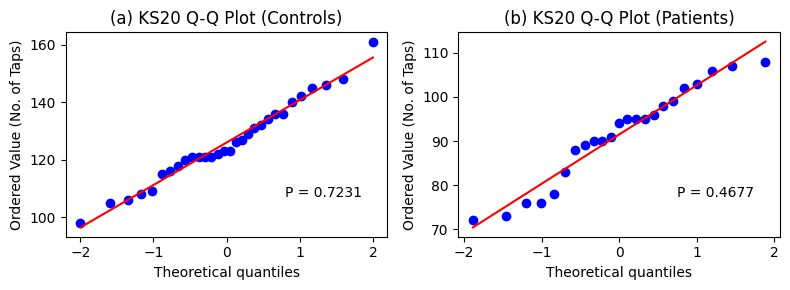

In [46]:
test_stat_c, pval_c = normaltest(df_control["ks20"])
print(pval_c)

test_stat_p, pval_p = normaltest(df_patient["ks20"])
print(pval_p)

txt_c = "P = " +str(round(pval_c,4))
txt_p = "P = " +str(round(pval_p,4))

fig = plt.figure(figsize=(8, 3))
gs = gridspec.GridSpec(1,2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
stats.probplot(df_control["ks20"], dist= "norm", plot = ax1)
ax1.text(0.8, 0.25, txt_c, transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
ax1.set_title("(a) KS20 Q-Q Plot (Controls)")
ax1.set_ylabel("Ordered Value (No. of Taps)")

ax2 = fig.add_subplot(gs[0,1])
stats.probplot(df_patient["ks20"], dist= "norm", plot = ax2)
ax2.text(0.8, 0.25, txt_p, transform=ax2.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
ax2.set_title("(b) KS20 Q-Q Plot (Patients)")
ax2.set_ylabel("Ordered Value (No. of Taps)")

plt.tight_layout()
plt.savefig(path_results+"ks20_normality_test.jpg")
plt.show()


#### Control KS20 CI calculation mean

In [47]:
mean_sample = df_control["ks20"].mean()
sigma = df_control["ks20"].std()
n = len(df_control["ks20"])

# Z-critical value for 95% CI
z_critical = stats.norm.ppf(0.975)  # 97.5th percentile for 95% CI

# Confidence Interval calculation
margin_of_error_z = z_critical * (sigma / np.sqrt(n))
ci_lower_z = mean_sample - margin_of_error_z
ci_upper_z = mean_sample + margin_of_error_z

print(f"mean ks20 control = {mean_sample}")
print(f"95% Confidence Interval using Normal Distribution: ({ci_lower_z:.2f}, {ci_upper_z:.2f})")

mean ks20 control = 126.0
95% Confidence Interval using Normal Distribution: (120.87, 131.13)


#### Control KS20 CI calculation median

In [48]:
median_sample = df_control["ks20"].median()
sigma = df_control["ks20"].std()
n = len(df_control["ks20"])

# Z-critical value for 95% CI
z_critical = stats.norm.ppf(0.975)  # 97.5th percentile for 95% CI

# Confidence Interval calculation
margin_of_error_z = z_critical * (sigma / np.sqrt(n))
ci_lower_z = median_sample - margin_of_error_z
ci_upper_z = median_sample + margin_of_error_z

print(f"meadiann ks20 control = {median_sample}")
print(f"std ks20 control = {sigma}")
print(f"95% Confidence Interval using Normal Distribution: ({ci_lower_z:.2f}, {ci_upper_z:.2f})")

meadiann ks20 control = 123.0
std ks20 control = 14.323840748664566
95% Confidence Interval using Normal Distribution: (117.87, 128.13)


#### Control AT20 CI calculation mean

In [49]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_control["mean_at20"], 2.5)
ci_upper = np.percentile(df_control["mean_at20"], 97.5)

print(df_control["mean_at20"].std())
print(f"mean at20 control = {df_control["mean_at20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

23.32825601278695
mean at20 control = 57.59700748617611
95% Confidence Interval using percentile: (20.33, 98.63)


#### Control AT20 CI calculation median

In [50]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_control["median_at20"], 2.5)
ci_upper = np.percentile(df_control["median_at20"], 97.5)

print(f"median at20 control = {df_control["median_at20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

median at20 control = 57.03333333333333
95% Confidence Interval using percentile: (18.53, 94.05)


#### Control IS20 CI calculation mean

In [51]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_control["mean_is20"], 2.5)
ci_upper = np.percentile(df_control["mean_is20"], 97.5)

print(f"mean is20 control = {df_control["mean_is20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

mean is20 control = 120.49087793759404
95% Confidence Interval using percentile: (93.96, 155.61)


#### Control IS20 CI calculation median

In [52]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_control["median_is20"], 2.5)
ci_upper = np.percentile(df_control["median_is20"], 97.5)

print(f"median is20 control = {df_control["median_is20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

median is20 control = 118.96666666666667
95% Confidence Interval using percentile: (92.62, 152.96)


#### Patient KS20 CI calculation mean

In [53]:
mean_sample = df_patient["ks20"].mean()
sigma = df_patient["ks20"].std()
n = len(df_patient["ks20"])

# Z-critical value for 95% CI
z_critical = stats.norm.ppf(0.975)  # 97.5th percentile for 95% CI

# Confidence Interval calculation
margin_of_error_z = z_critical * (sigma / np.sqrt(n))
ci_lower_z = mean_sample - margin_of_error_z
ci_upper_z = mean_sample + margin_of_error_z

print(f"mean ks20 patient = {mean_sample}")
print(f"95% Confidence Interval using Normal Distribution: ({ci_lower_z:.2f}, {ci_upper_z:.2f})")

mean ks20 patient = 91.47826086956522
95% Confidence Interval using Normal Distribution: (87.03, 95.93)


#### Patient KS20 CI calculation median

In [54]:
mean_sample = df_patient["ks20"].median()
sigma = df_patient["ks20"].std()
n = len(df_patient["ks20"])

# Z-critical value for 95% CI
z_critical = stats.norm.ppf(0.975)  # 97.5th percentile for 95% CI

# Confidence Interval calculation
margin_of_error_z = z_critical * (sigma / np.sqrt(n))
ci_lower_z = mean_sample - margin_of_error_z
ci_upper_z = mean_sample + margin_of_error_z

print(f"median ks20 patient = {mean_sample}")
print(f"95% Confidence Interval using Normal Distribution: ({ci_lower_z:.2f}, {ci_upper_z:.2f})")

median ks20 patient = 94.0
95% Confidence Interval using Normal Distribution: (89.55, 98.45)


#### Patient AT20 CI calculation mean

In [55]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_patient["mean_at20"], 2.5)
ci_upper = np.percentile(df_patient["mean_at20"], 97.5)

print(f"mean at20 patient = {df_patient["mean_at20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

mean at20 patient = 88.54544878787456
95% Confidence Interval using percentile: (85.98, 92.56)


#### Patient AT20 CI calculation median

In [56]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_patient["median_at20"], 2.5)
ci_upper = np.percentile(df_patient["median_at20"], 97.5)

print(f"mean at20 patient = {df_patient["median_at20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

mean at20 patient = 88.47761925914942
95% Confidence Interval using percentile: (84.33, 92.79)


#### Patient IS20 CI calculation mean

In [57]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_patient["mean_is20"], 2.5)
ci_upper = np.percentile(df_patient["mean_is20"], 97.5)

print(f"mean is20 patient = {df_patient["mean_is20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

mean is20 patient = 157.2329264447951
95% Confidence Interval using percentile: (150.95, 166.71)


#### Patient IS20 CI calculation median

In [58]:
# Compute 95% percentile-based confidence interval
ci_lower = np.percentile(df_patient["median_is20"], 2.5)
ci_upper = np.percentile(df_patient["median_is20"], 97.5)

print(f"median is20 patient = {df_patient["median_is20"].mean()}")
print(f"95% Confidence Interval using percentile: ({ci_lower:.2f}, {ci_upper:.2f})")

median is20 patient = 156.4114605456857
95% Confidence Interval using percentile: (145.70, 164.34)


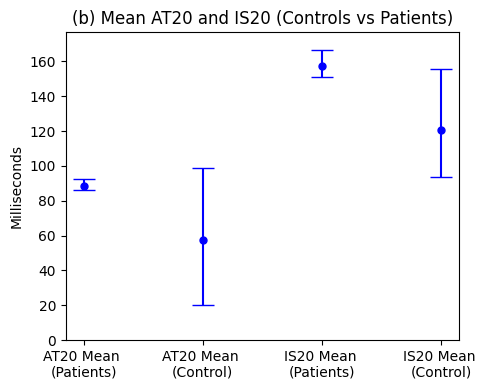

In [60]:
means = [88.54, 57.59, 157.23, 120.49]  
lower_bounds = [85.98, 20.33, 150.9, 93.56]
upper_bounds = [92.56, 98.63, 166.71, 155.61]

errors = [np.array(means) - np.array(lower_bounds), np.array(upper_bounds) - np.array(means)]

x_positions = [1, 1.2, 1.4, 1.6]  

fig, ax = plt.subplots(figsize=(5, 4))
ax.errorbar(x_positions, means, yerr=errors, fmt='o', markersize=5, capsize=8, capthick=1, color='blue')

ax.set_ylabel("Milliseconds")
ax.set_title("(b) Mean AT20 and IS20 (Controls vs Patients)")
ax.set_xticks(x_positions)
ax.set_xticklabels(["AT20 Mean \n(Patients)", "AT20 Mean \n(Control)", "IS20 Mean \n(Patients)", "IS20 Mean \n(Control)"])

ax.set_ylim(0, max(upper_bounds) + 10)

plt.tight_layout()
plt.savefig(path_results+"Mean CI plot AT IS.jpg")
plt.show()


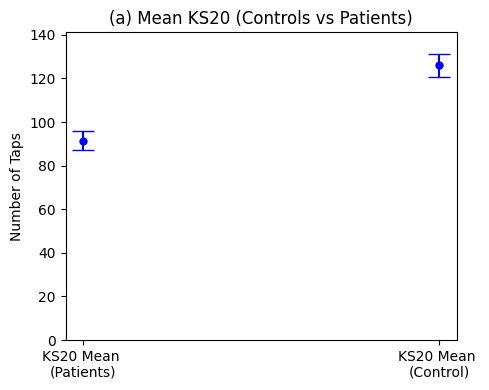

In [61]:
means = [91.47, 126]  # Mean values
lower_bounds = [87.03, 120.87]  
upper_bounds = [95.93, 131.13]  

errors = [np.array(means) - np.array(lower_bounds), np.array(upper_bounds) - np.array(means)]

x_positions = [2, 4]

fig, ax = plt.subplots(figsize=(5, 4))
ax.errorbar(x_positions, means, yerr=errors, fmt='o', markersize=5, capsize=8, capthick=1, color='blue')

ax.set_ylabel("Number of Taps")
ax.set_title("(a) Mean KS20 (Controls vs Patients)")
ax.set_xticks(x_positions)
ax.set_xticklabels(["KS20 Mean \n(Patients)", "KS20 Mean \n(Control)"])

ax.set_ylim(0, max(upper_bounds) + 10)


plt.tight_layout()
plt.savefig(path_results+"Mean CI KS.jpg")
plt.show()